In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

In [2]:
# j

train=pd.read_csv('housing_project_train.csv')
train=pd.DataFrame(train)

In [3]:
train.shape    # the dimension of the data set is 1168 rows and 81 columns

(1168, 81)

In [4]:
test=pd.read_csv('housing_project_test.csv')
test=pd.DataFrame(test)

In [5]:
test.shape    # the dimension of the data set for test file is 292 rows and 80 columns

(292, 80)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

we conclude that the train and test data contains object, float and integer types.

In [8]:
train.isnull().sum(),test.isnull().sum()

(Id                 0
 MSSubClass         0
 MSZoning           0
 LotFrontage      214
 LotArea            0
                 ... 
 MoSold             0
 YrSold             0
 SaleType           0
 SaleCondition      0
 SalePrice          0
 Length: 81, dtype: int64,
 Id                0
 MSSubClass        0
 MSZoning          0
 LotFrontage      45
 LotArea           0
                  ..
 MiscVal           0
 MoSold            0
 YrSold            0
 SaleType          0
 SaleCondition     0
 Length: 80, dtype: int64)

we conclude that there are missing values in train and test data set.

In [9]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold
count,292.000000,292.000000,247.000000,292.000000,292.000000,292.000000,292.000000,292.000000,291.000000,292.000000,...,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,0.0,292.000000,292.000000,292.000000
mean,755.955479,57.414384,66.425101,10645.143836,6.078767,5.493151,1972.616438,1985.294521,109.171821,439.294521,...,86.397260,47.061644,17.708904,2.489726,15.099315,0.0,NaN,28.184932,6.232877,2007.859589
std,442.565228,43.780649,21.726343,13330.669795,1.356147,1.063267,30.447016,20.105792,175.030021,429.559675,...,121.898836,65.865449,51.892906,30.247488,58.483473,0.0,NaN,224.036218,2.774556,1.322867
min,6.000000,20.000000,21.000000,1526.000000,3.000000,3.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,1.000000,2006.000000
25%,377.750000,20.000000,53.500000,7200.000000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,4.000000,2007.000000
50%,778.000000,50.000000,65.000000,9200.000000,6.000000,5.000000,1976.000000,1994.000000,0.000000,369.500000,...,0.000000,28.500000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,6.000000,2008.000000
75%,1152.250000,70.000000,79.000000,11658.750000,7.000000,6.000000,2001.000000,2003.250000,180.000000,700.500000,...,149.250000,66.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,8.000000,2009.000000
max,1456.000000,190.000000,150.000000,215245.000000,10.000000,9.000000,2009.000000,2010.000000,1031.000000,1767.000000,...,728.000000,418.000000,330.000000,407.000000,396.000000,0.0,NaN,3500.000000,12.000000,2010.000000


In [11]:
train['MSSubClass'].value_counts() 

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


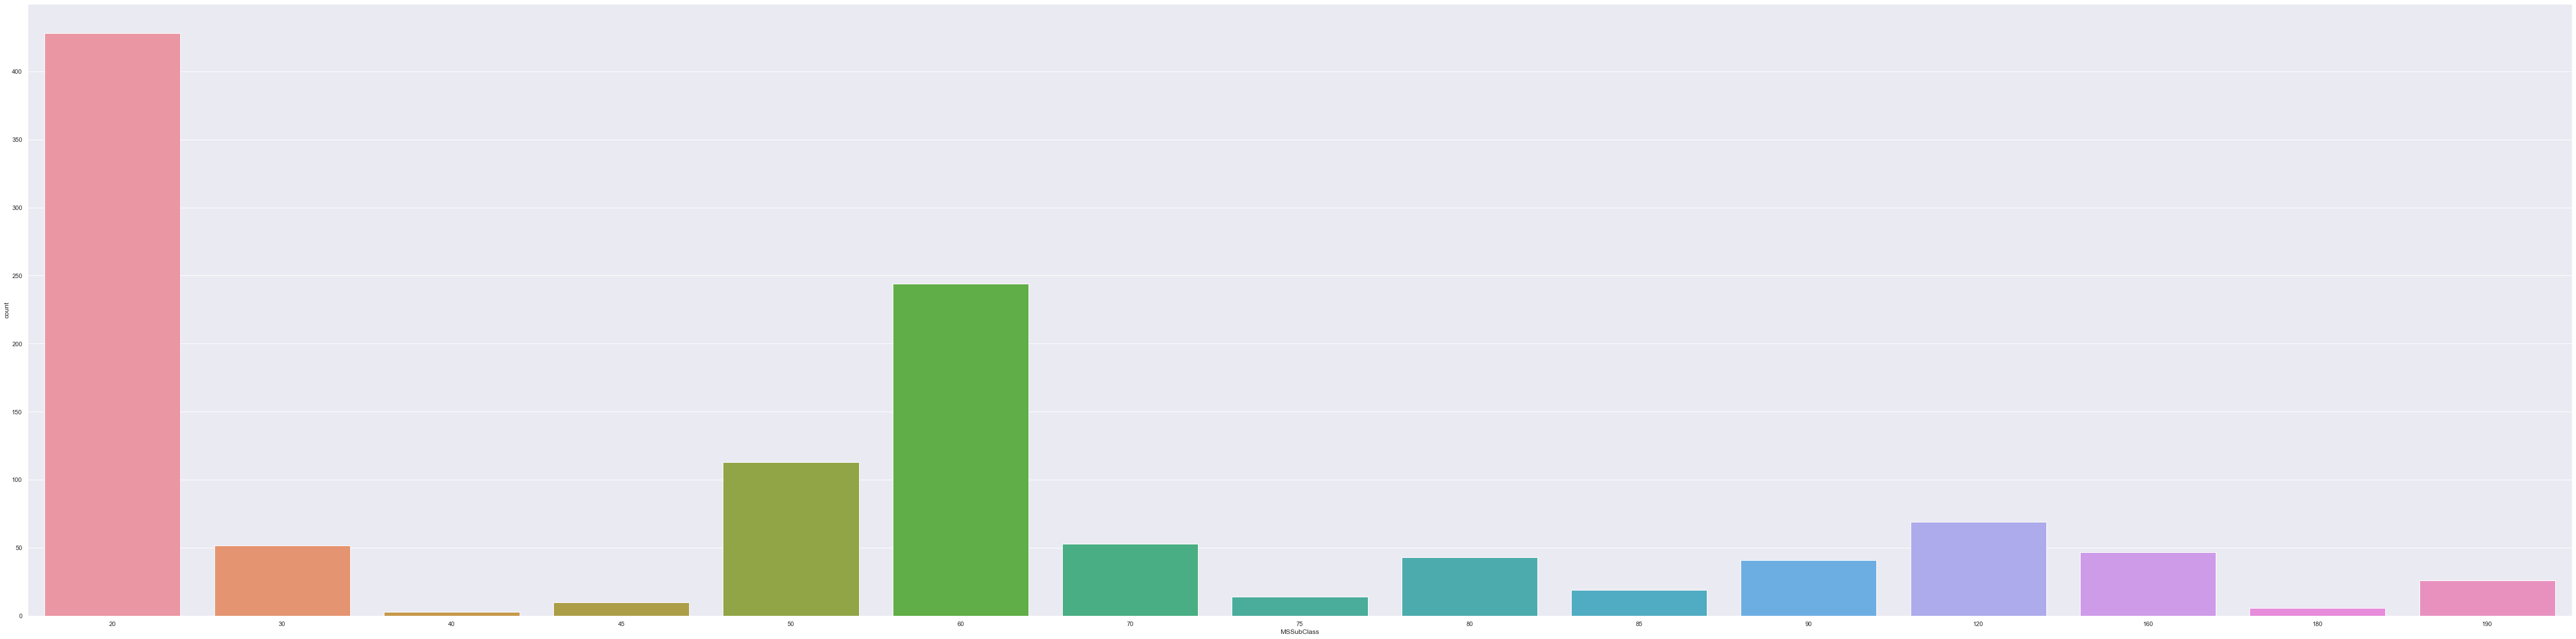

In [12]:
sns.set()
%matplotlib inline
plt.figure(figsize=(81,20))
sns.countplot('MSSubClass',data=train)  

In [13]:
train['MSZoning'].value_counts()

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


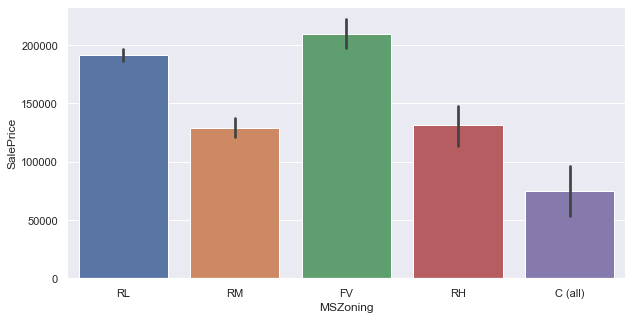

In [14]:
plt.figure(figsize=(10,5))
sns.barplot('MSZoning','SalePrice',data=train)

FV zone has highest Sales price while C(all) has least price.

In [15]:
train['LotFrontage'].value_counts()

60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
112.0      1
111.0      1
144.0      1
102.0      1
149.0      1
Name: LotFrontage, Length: 106, dtype: int64

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


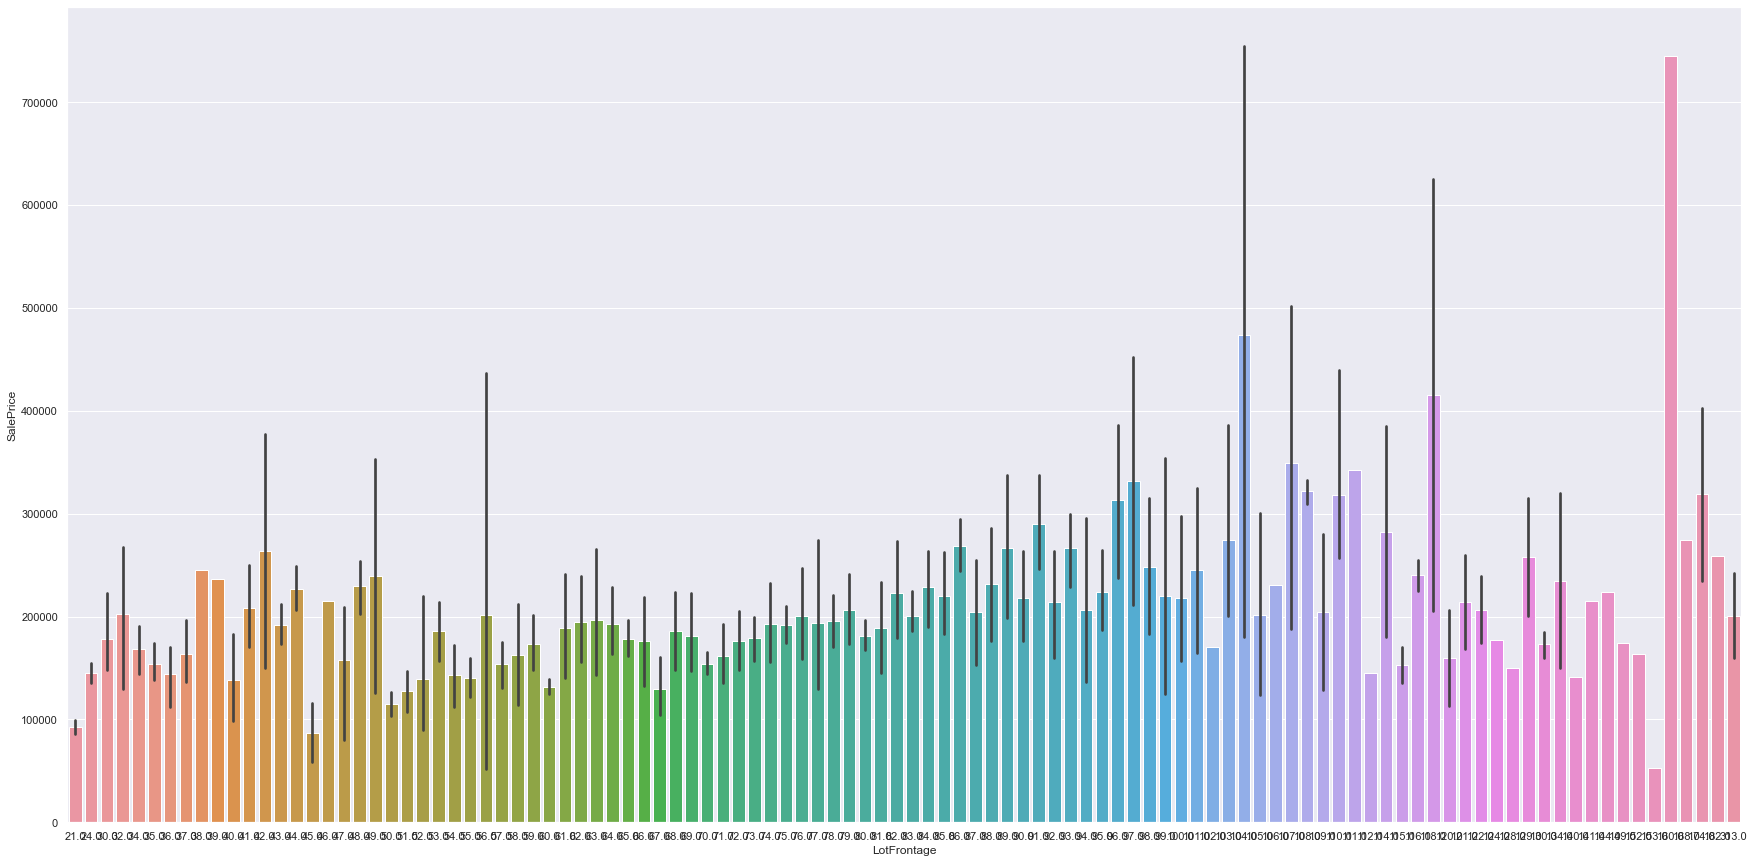

In [16]:
plt.figure(figsize=(30,15))
sns.barplot('LotFrontage','SalePrice',data=train)

In [17]:
train['LotArea'].value_counts()

9600     21
7200     18
6000     16
8400     14
9000     11
         ..
9439      1
7390      1
8160      1
7388      1
13284     1
Name: LotArea, Length: 892, dtype: int64

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


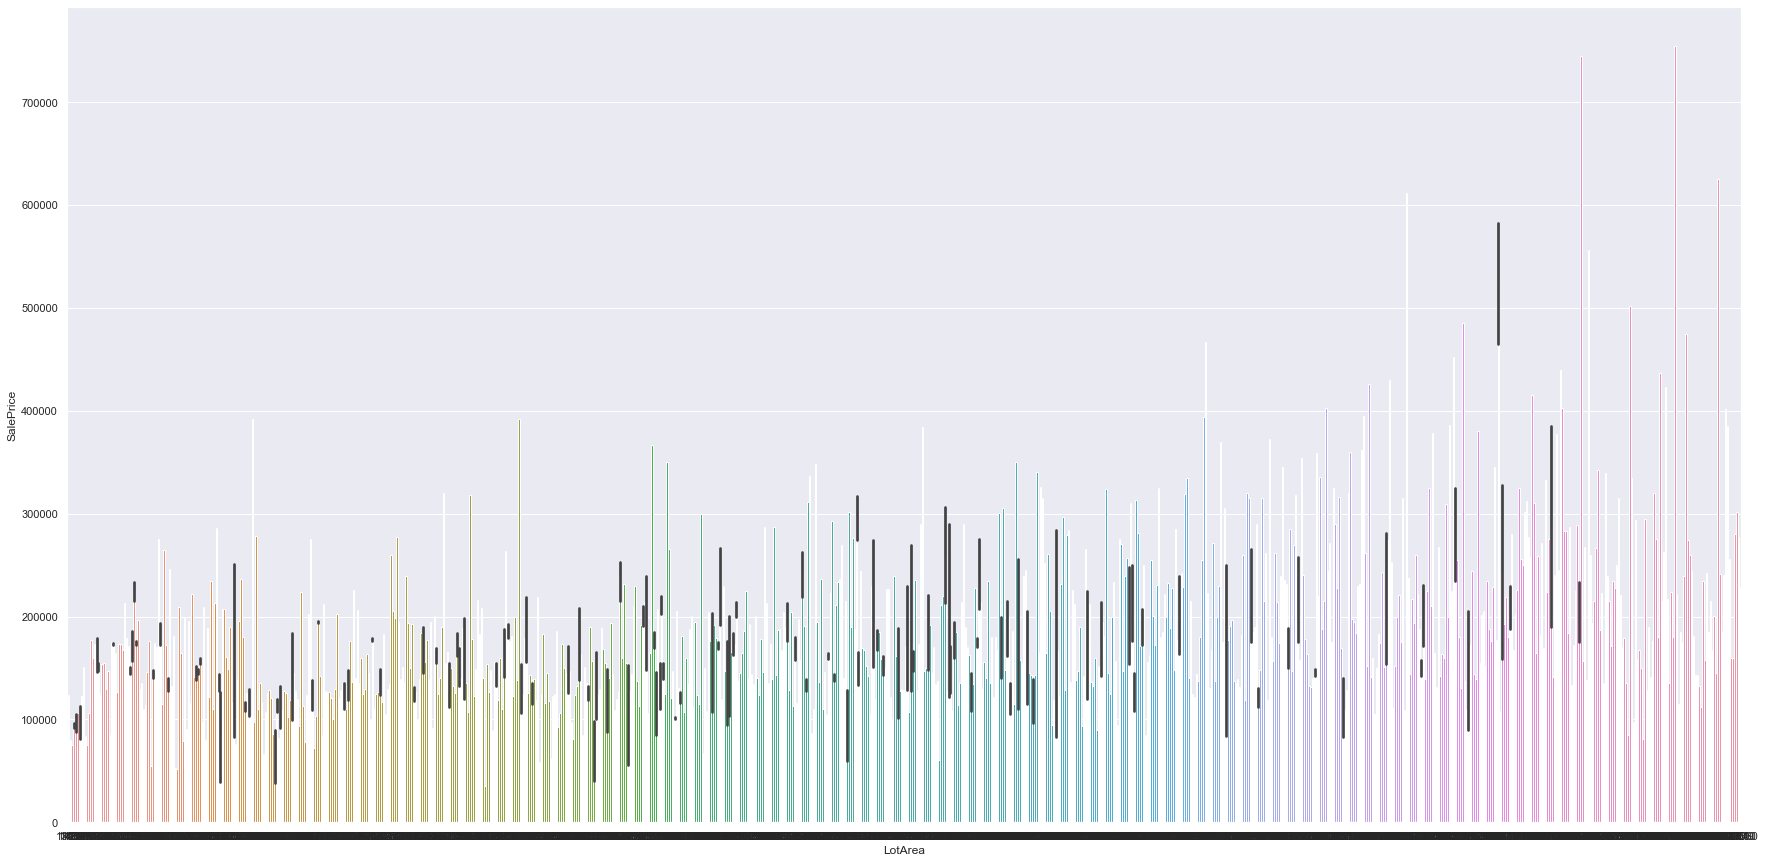

In [18]:
plt.figure(figsize=(30,15))
sns.barplot('LotArea','SalePrice',data=train)

In [19]:
train['Street'].value_counts()    # We have some null values present

Pave    1164
Grvl       4
Name: Street, dtype: int64

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


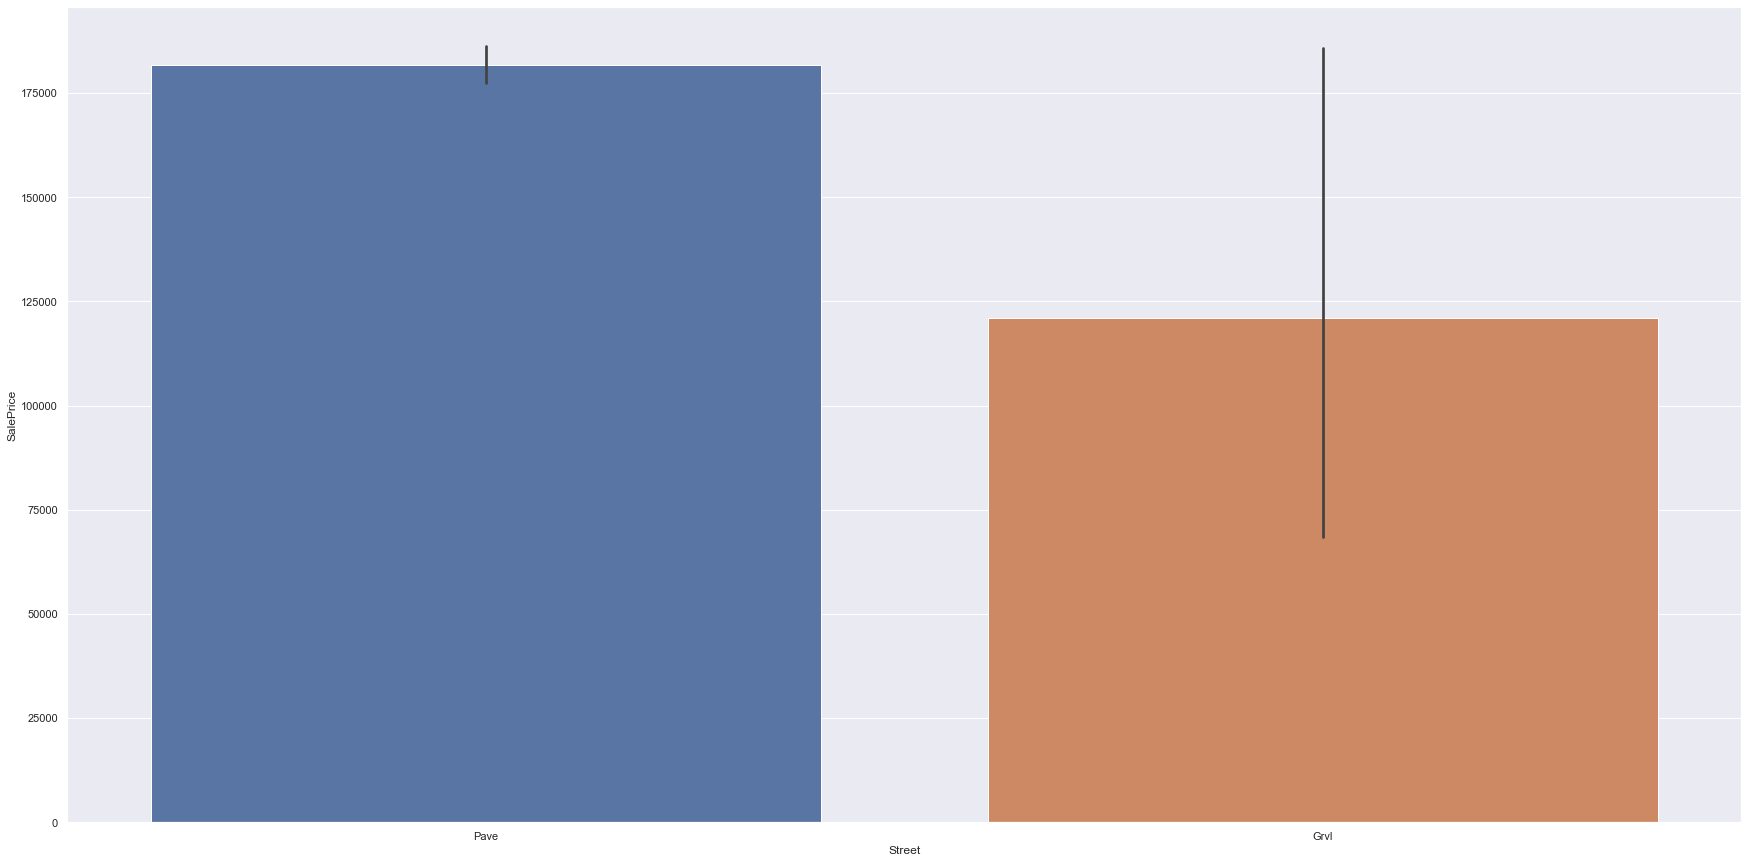

In [20]:
plt.figure(figsize=(30,15))
sns.barplot('Street','SalePrice',data=train)

We conclude that the rates are high for Pav street and less for Grvl street.

In [21]:
train['Alley'].value_counts()  # We have some null values present

Grvl    41
Pave    36
Name: Alley, dtype: int64

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


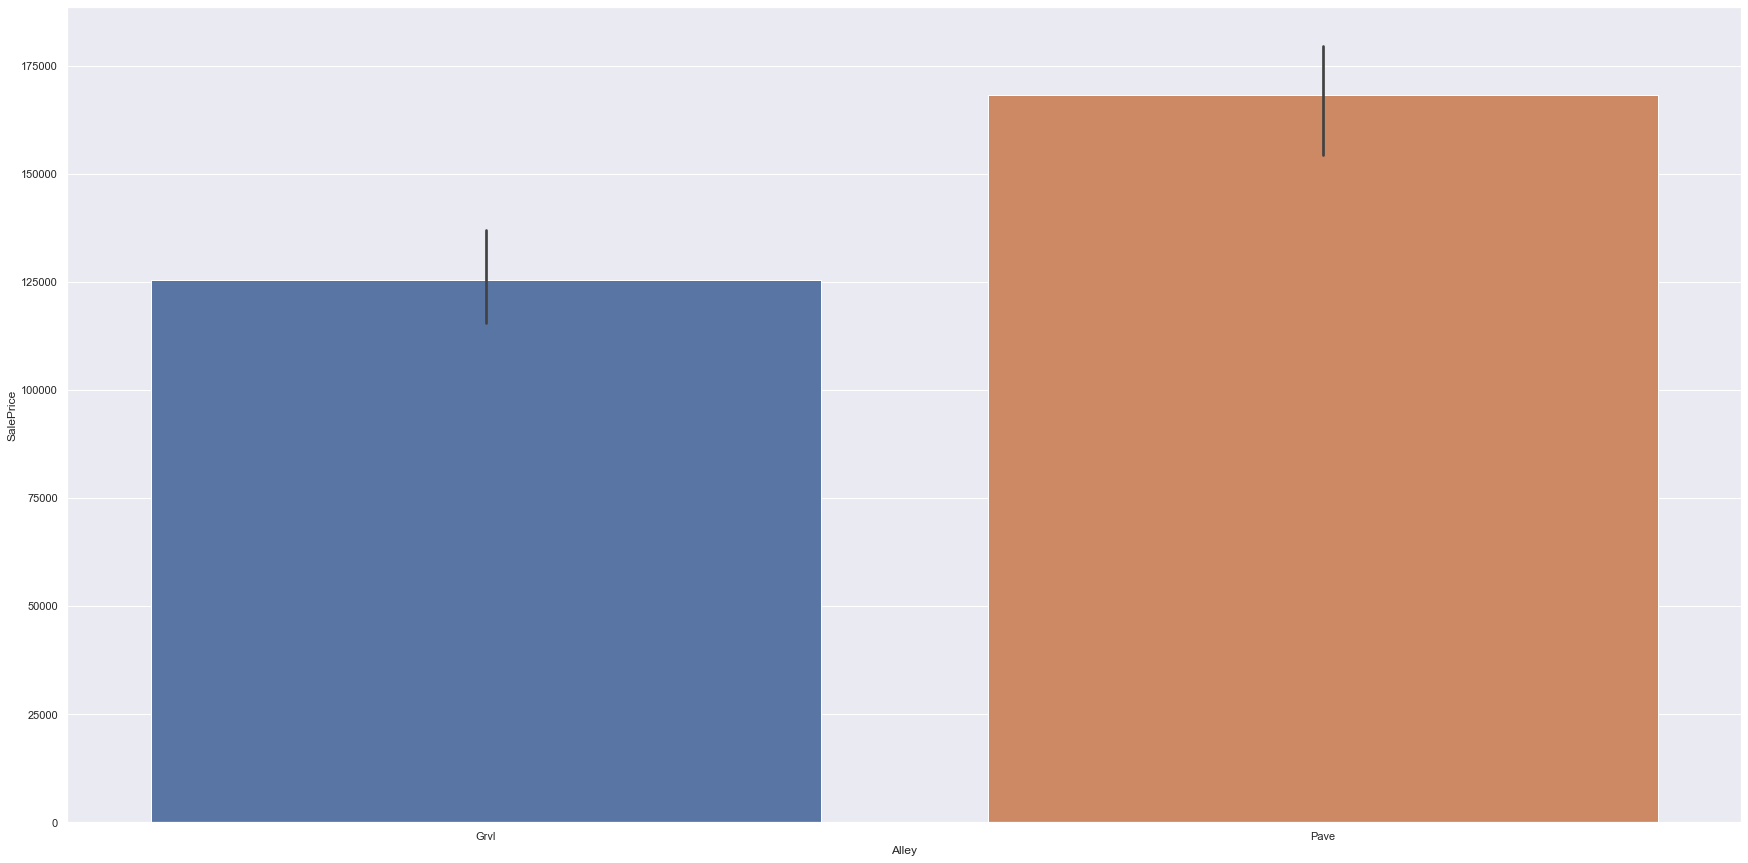

In [22]:
plt.figure(figsize=(30,15))
sns.barplot('Alley','SalePrice',data=train)

Alley with Pavel is having high prices compared to Grvl, this can be learned from above results.

In [23]:
train['LotShape'].value_counts()

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


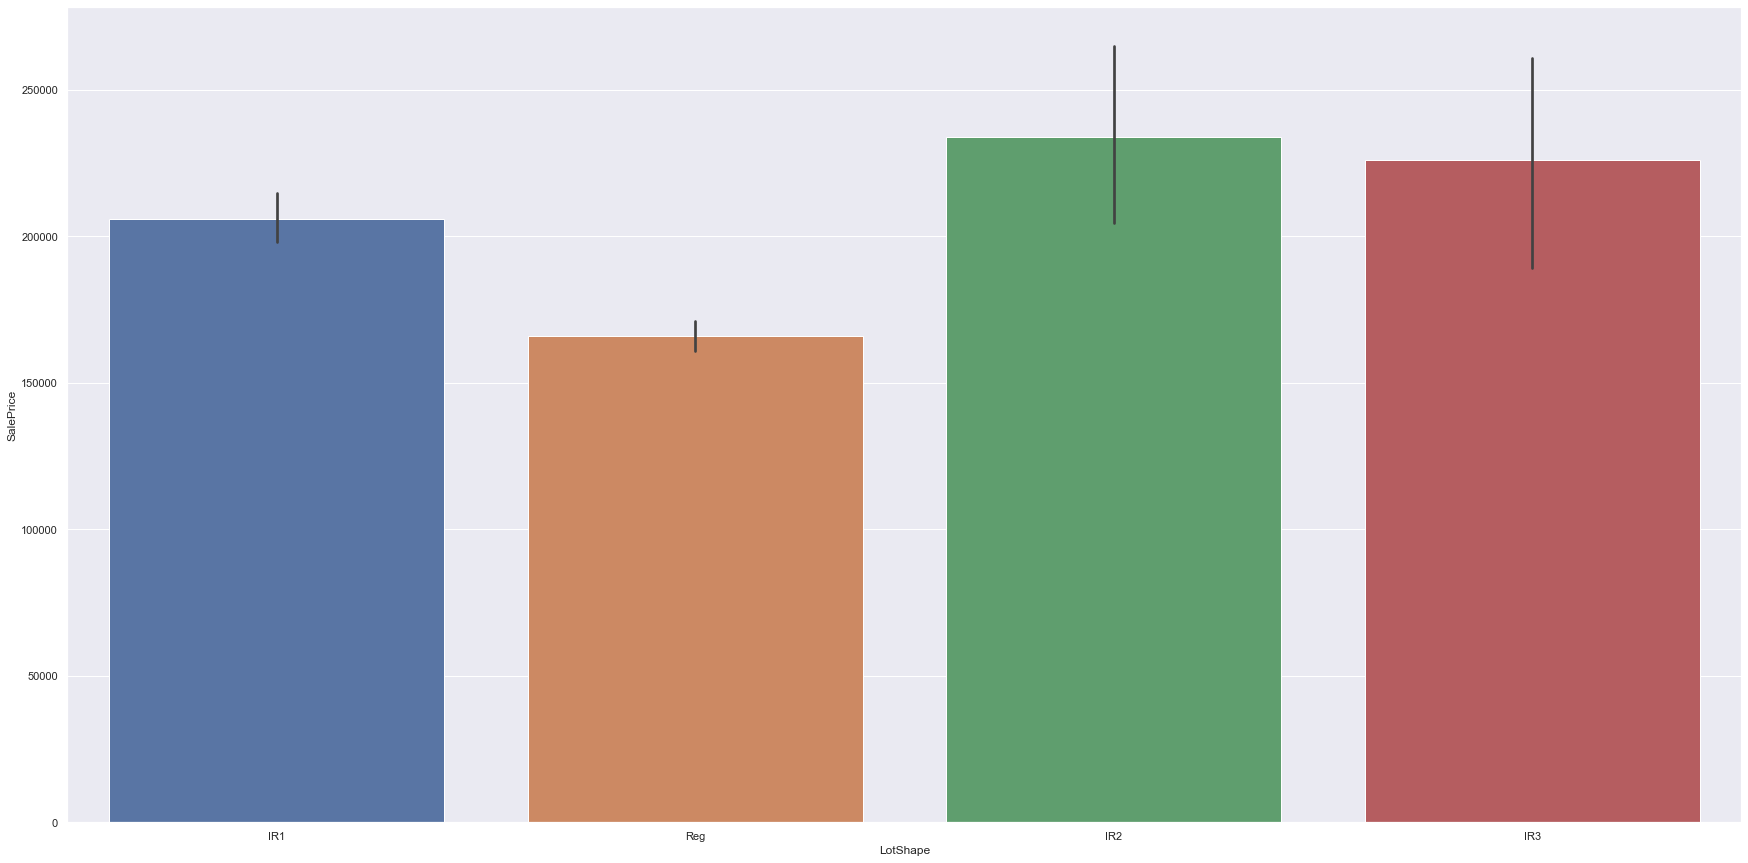

In [24]:
plt.figure(figsize=(30,15))
sns.barplot('LotShape','SalePrice',data=train)

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
        
We conclude that the lot sixw IR2 that is Moderately irrregular is having High asle price followed by Reg, IR3, and IR1 with least price.

In [25]:
train['LandContour'].value_counts()

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


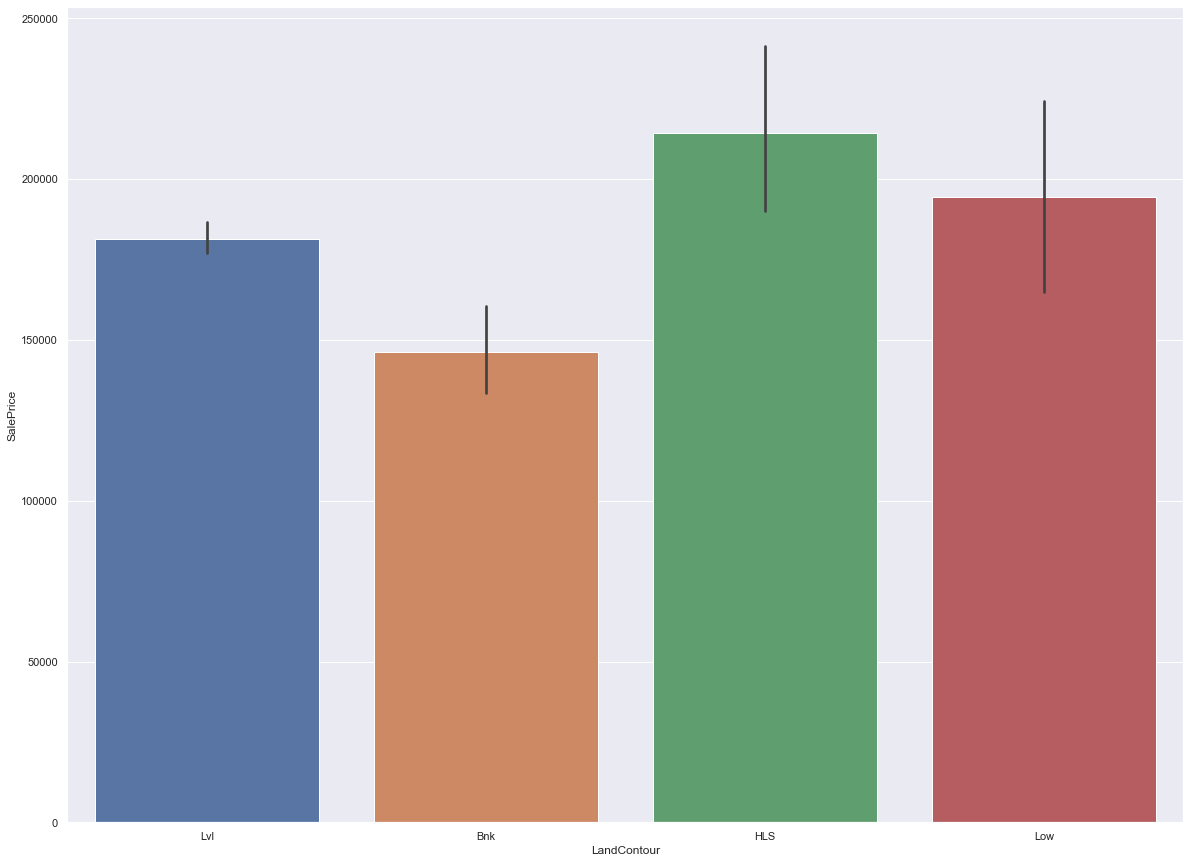

In [26]:
plt.figure(figsize=(20,15))
sns.barplot('LandContour','SalePrice',data=train)

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
        
We conclude that HLS is having high price followed by Low, Lvl and Bnk has the least price.

In [27]:
train['Utilities'].value_counts()

AllPub    1168
Name: Utilities, dtype: int64

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


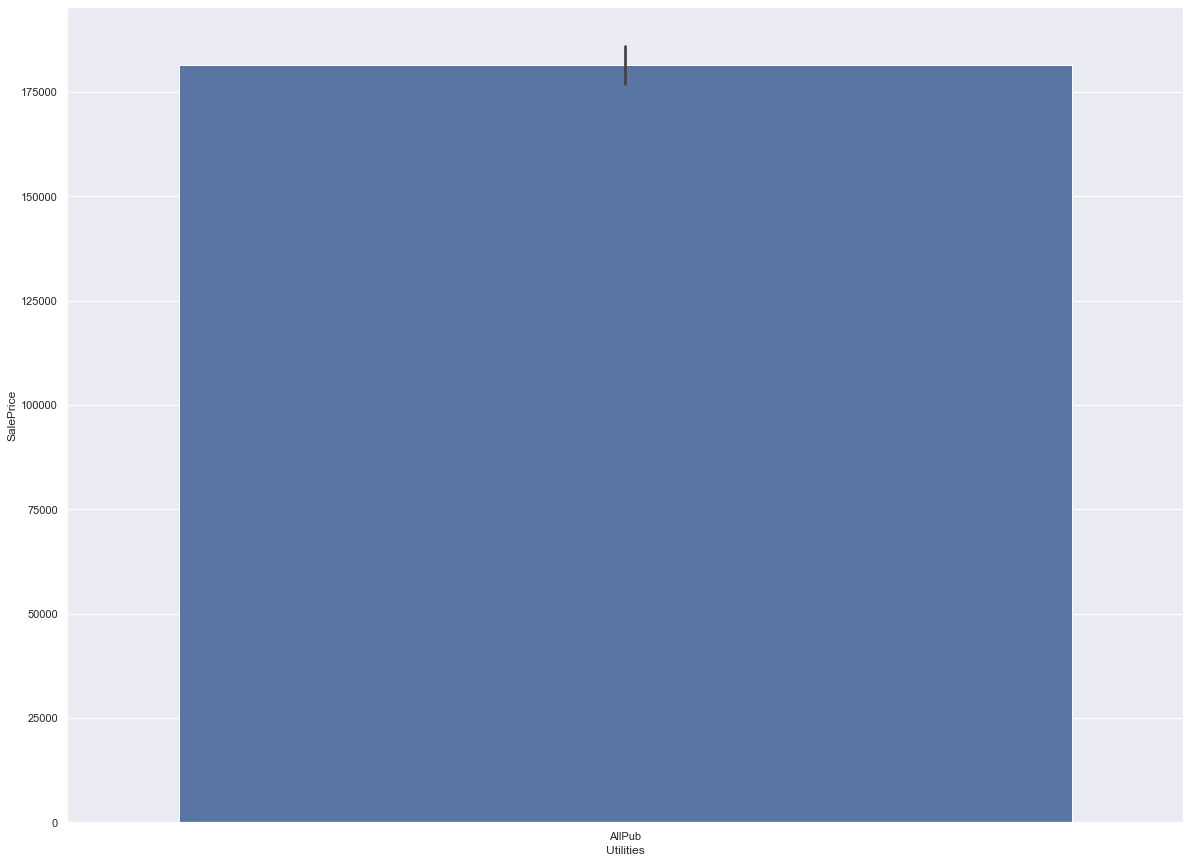

In [28]:
plt.figure(figsize=(20,15))
sns.barplot('Utilities','SalePrice',data=train)

We conclude that all the properties listed in data set have all the utilities present.

In [29]:
train['LotConfig'].value_counts()

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


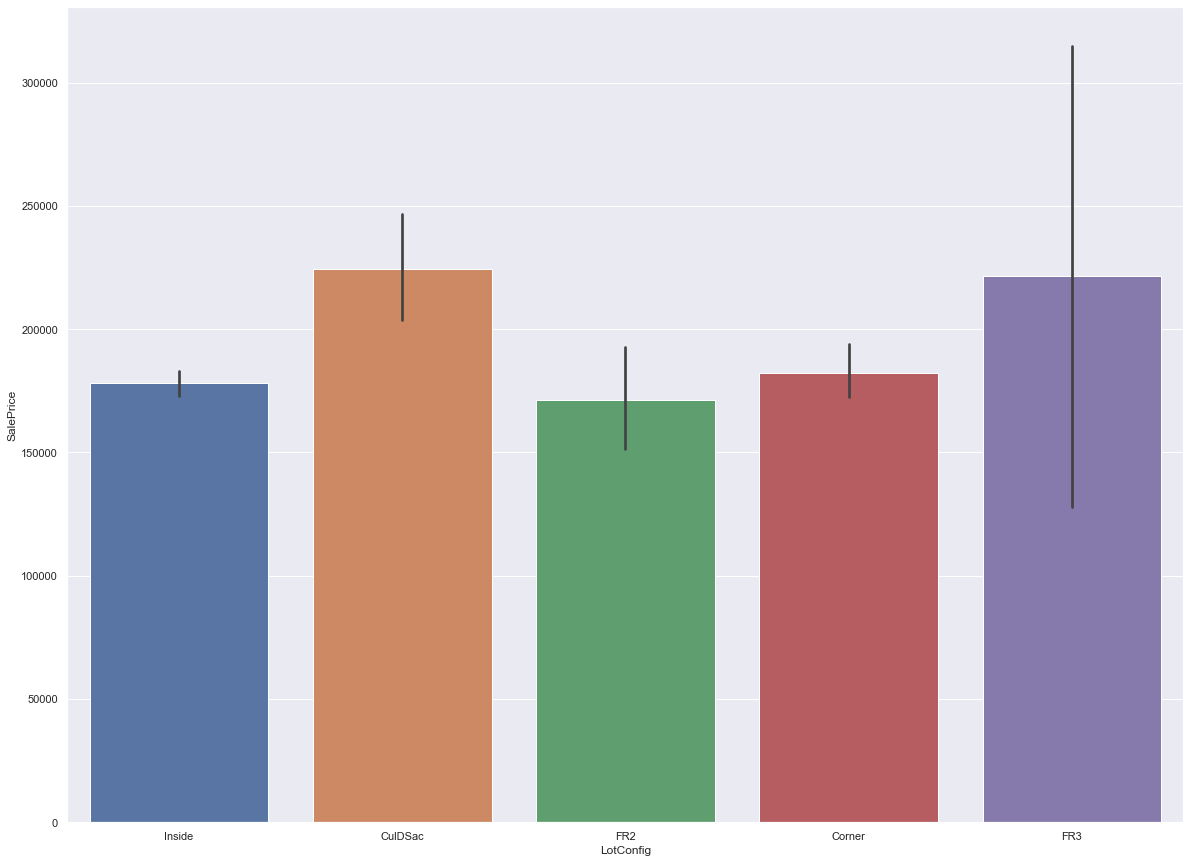

In [30]:
plt.figure(figsize=(20,15))
sns.barplot('LotConfig','SalePrice',data=train)

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	

We conclude that the prices of the house are high when in  CulDSac and FR3 follwed by corner, FR2 followed by Inside and least for FR2.

In [31]:
train['LandSlope'].value_counts()

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


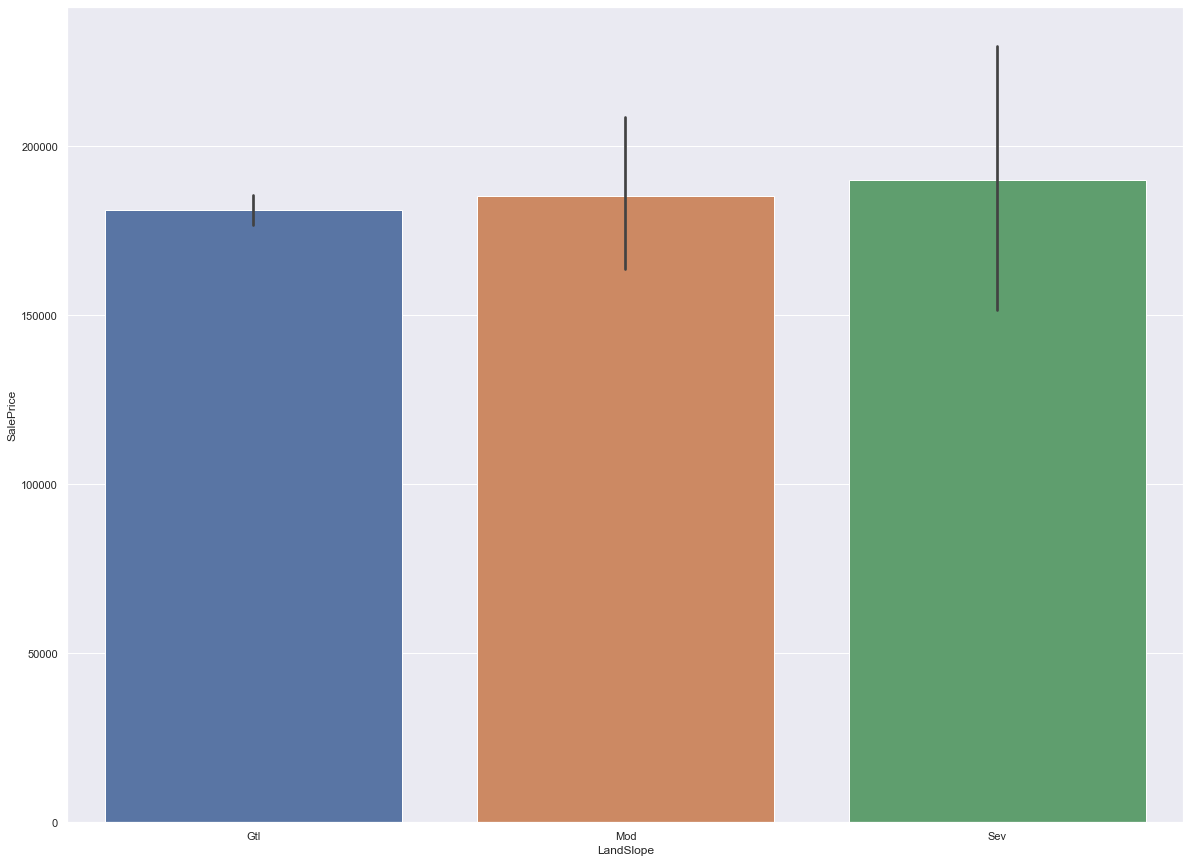

In [32]:
plt.figure(figsize=(20,15))
sns.barplot('LandSlope','SalePrice',data=train)

       Gtl	Gentle slope
       Mod	Moderate Slope
       Sev	Severe Slope
    
    We understand from above details that the house with Sev have high price followed by Mod and Gtl have the least price.

In [33]:
train['Neighborhood'].value_counts()

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
ClearCr     24
Timber      24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


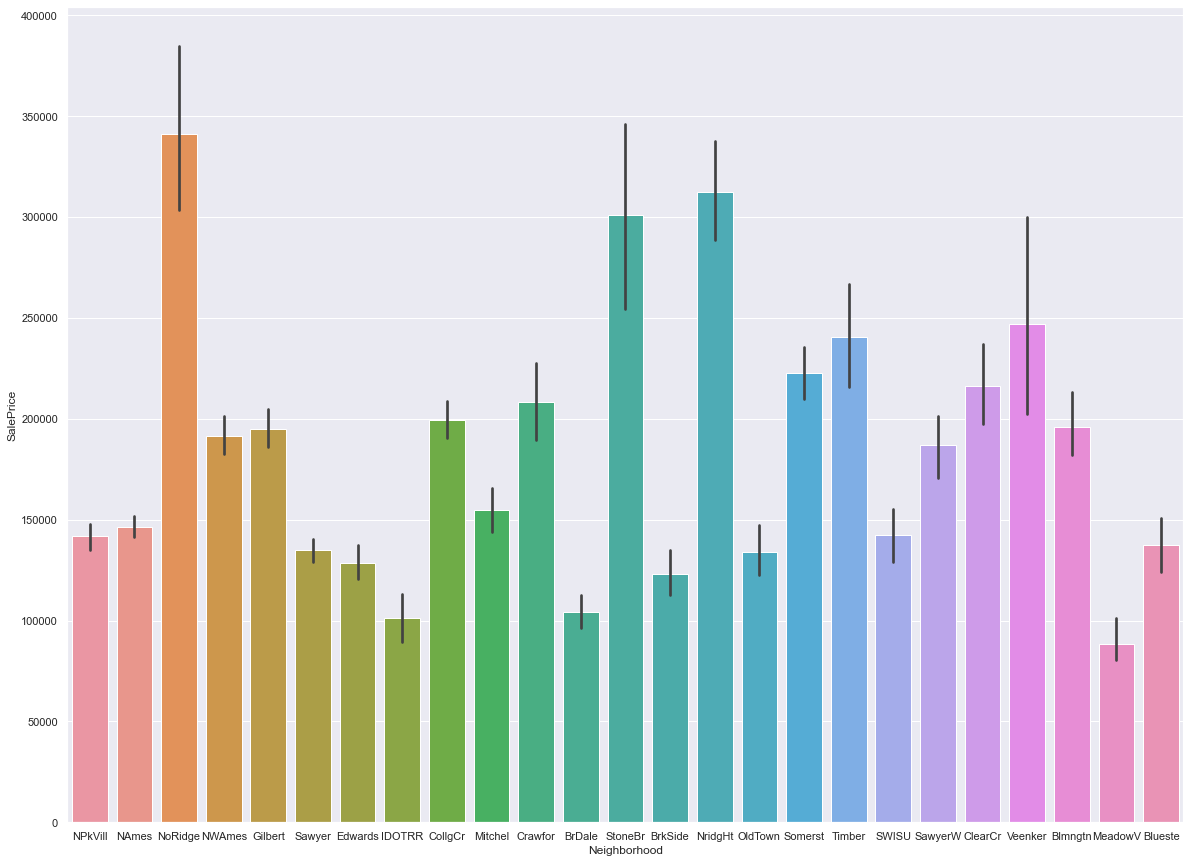

In [34]:
plt.figure(figsize=(20,15))
sns.barplot('Neighborhood','SalePrice',data=train)

Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
        
        
        We conclude that the NoRidge	Northridge Neighborhood have the highest pricess while MeadowV	Meadow Village have least price.

In [35]:
train['Condition1'].value_counts()

Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


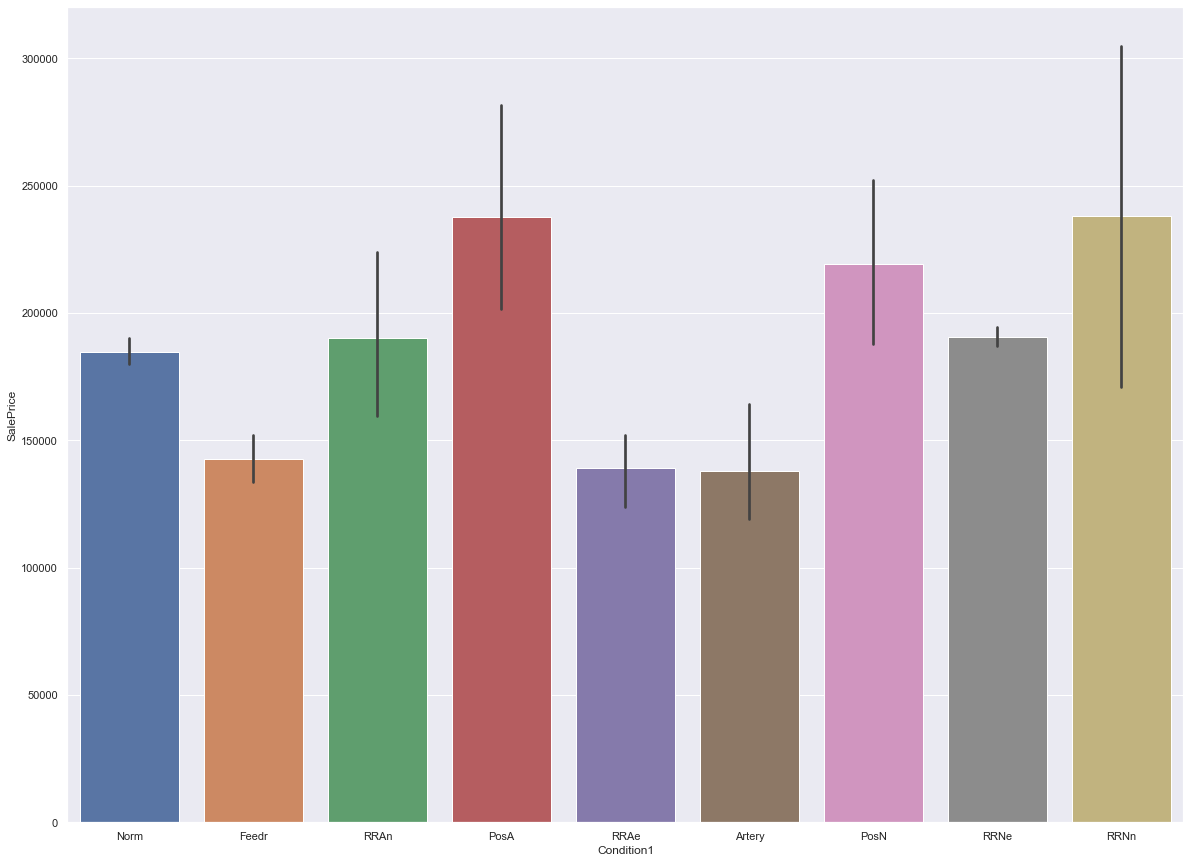

In [36]:
plt.figure(figsize=(20,15))
sns.barplot('Condition1','SalePrice',data=train)

Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
        
        We conclude that PosA and RRAn have high prices while  RRAe and Artery have least prices.

In [37]:
train['Condition2'].value_counts()

Norm      1154
Feedr        6
PosN         2
Artery       2
PosA         1
RRNn         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


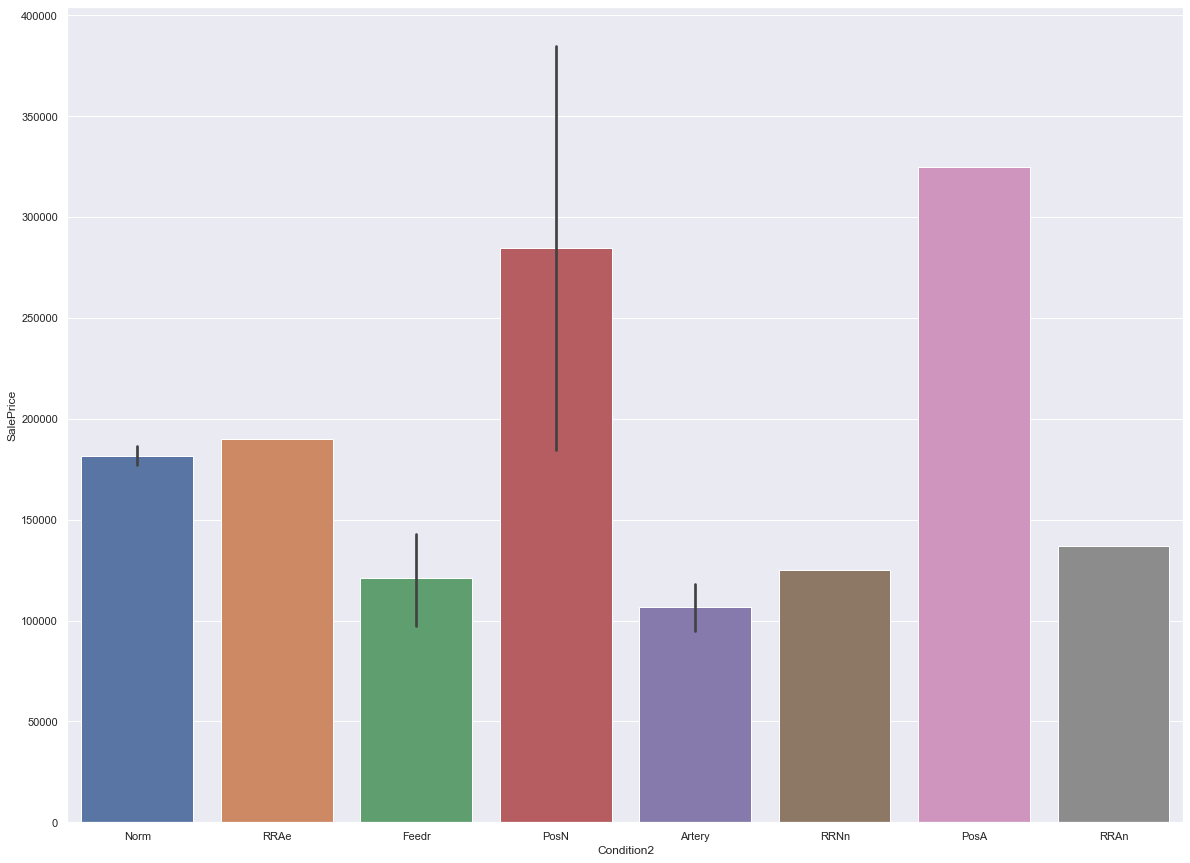

In [38]:
plt.figure(figsize=(20,15))
sns.barplot('Condition2','SalePrice',data=train)

Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
    
    
    We conclude that PosA have the highest prices while Artery have least prices.
   

In [39]:
train['BldgType'].value_counts()

1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


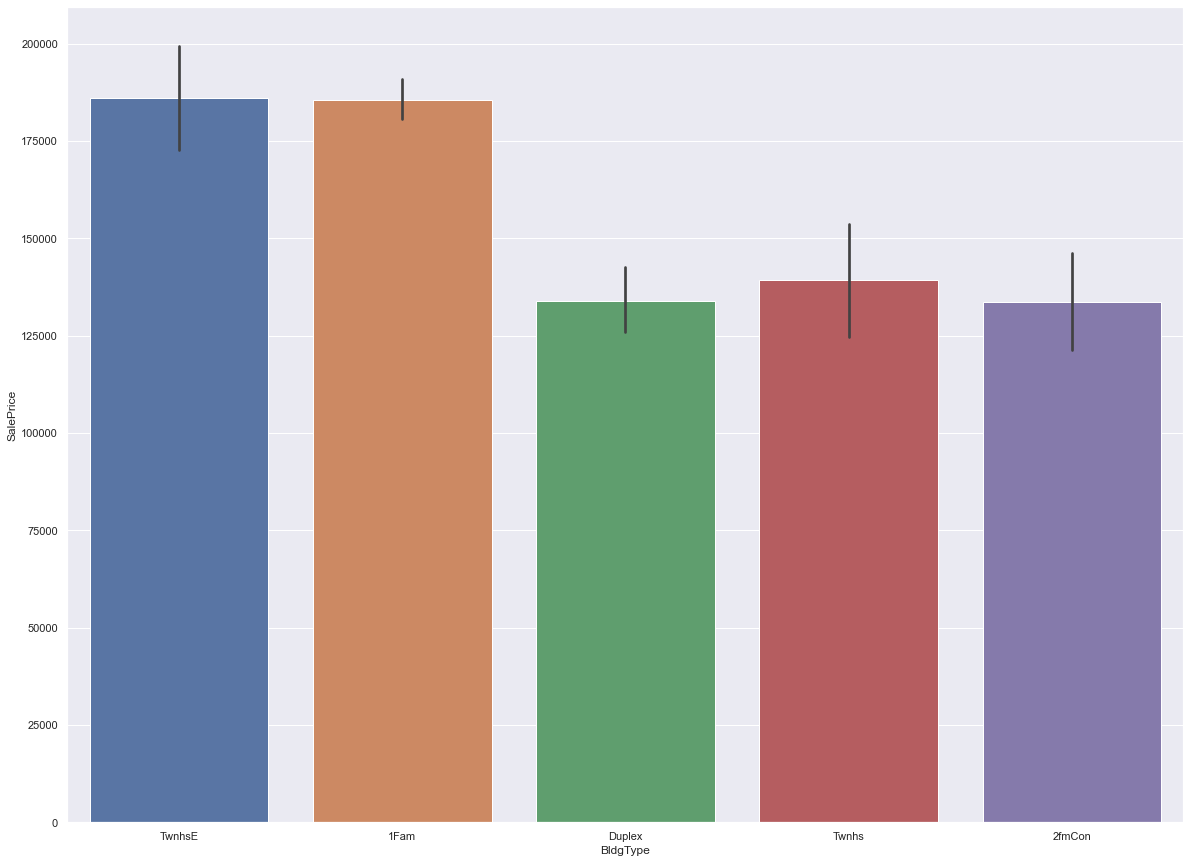

In [40]:
plt.figure(figsize=(20,15))
sns.barplot('BldgType','SalePrice',data=train)

BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
    
    From above we conclude that TwnhsE have high prices while Duplx building have least prices.
    

In [41]:
train['HouseStyle'].value_counts()

1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


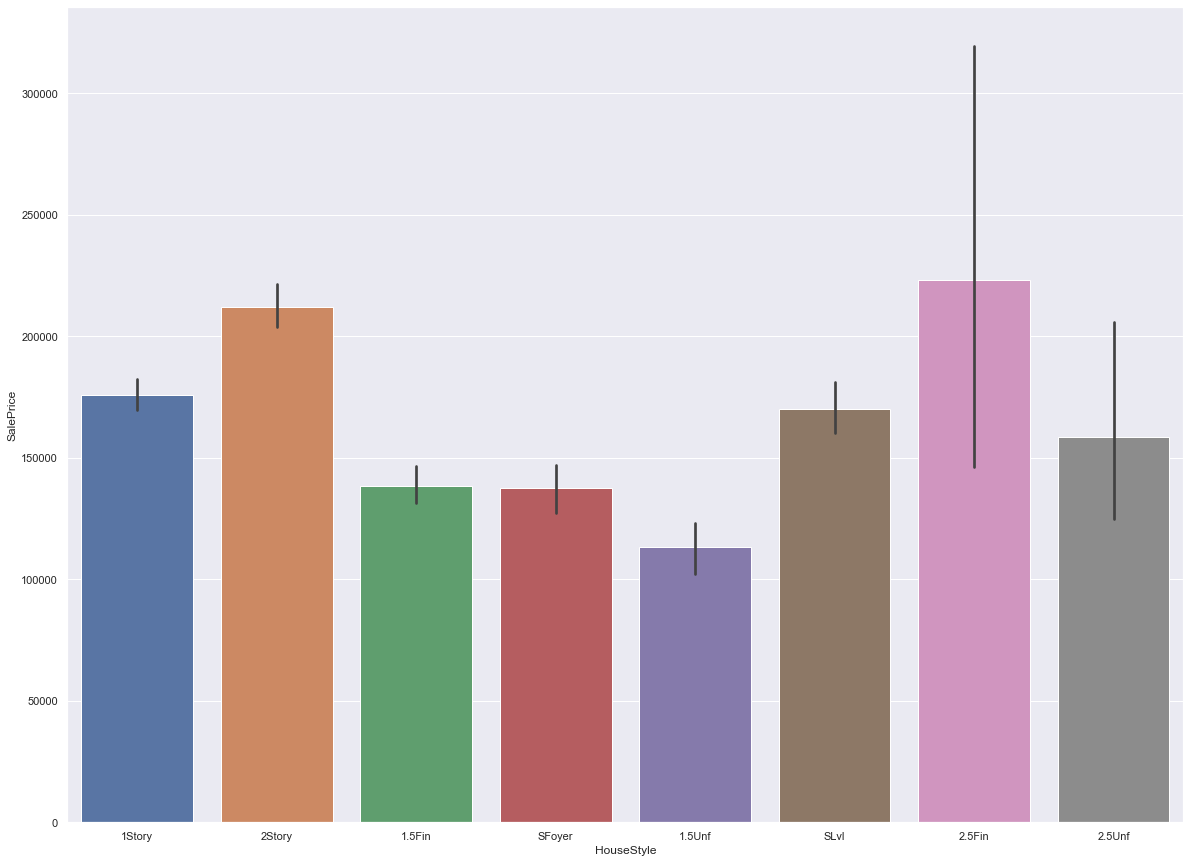

In [42]:
plt.figure(figsize=(20,15))
sns.barplot('HouseStyle','SalePrice',data=train)

HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
        
        We conclude that  2.5Fin finished have high prices while 1.5Unf have least prices.

In [43]:
train['OverallQual'].value_counts()

5     314
6     295
7     260
8     138
4      93
9      32
3      16
10     15
2       3
1       2
Name: OverallQual, dtype: int64

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


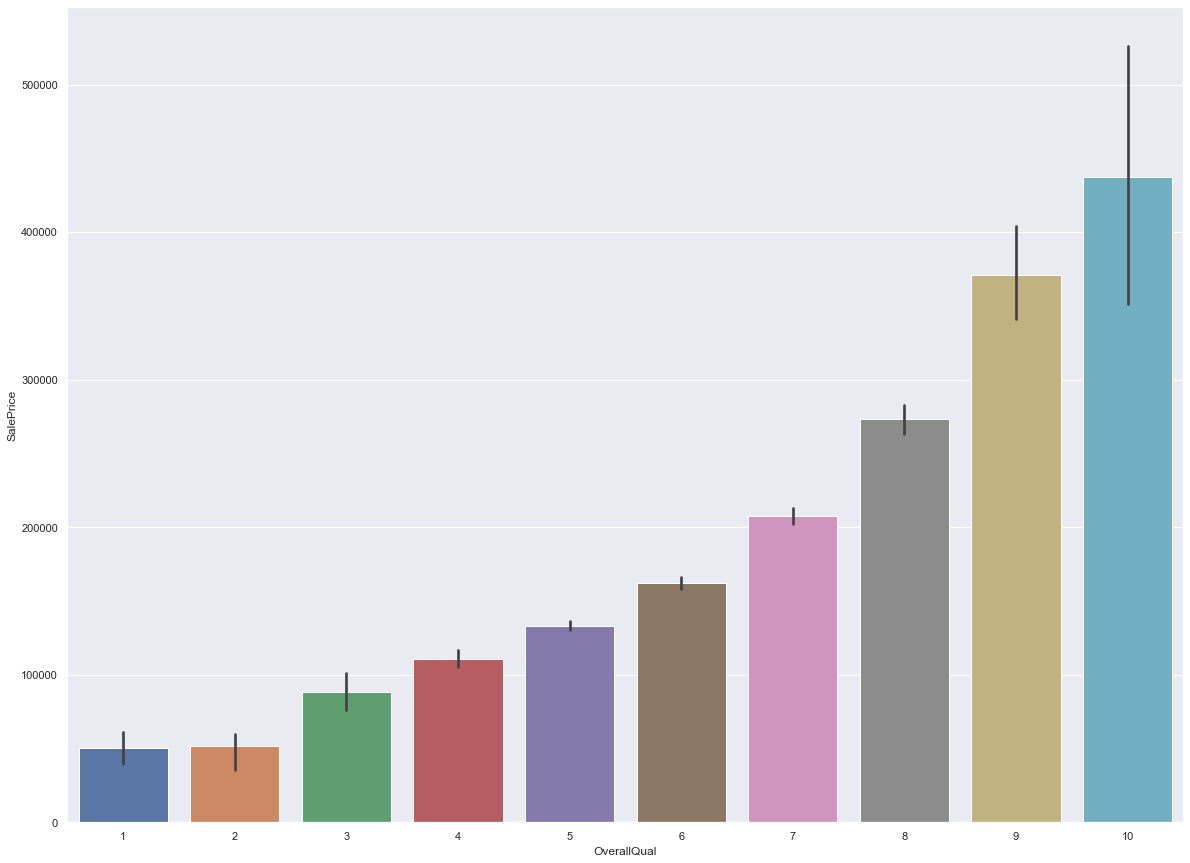

In [44]:
plt.figure(figsize=(20,15))
sns.barplot('OverallQual','SalePrice',data=train)

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

In [46]:
train['OverallCond'].value_counts()

5    640
6    209
7    172
8     61
4     43
3     21
9     16
2      5
1      1
Name: OverallCond, dtype: int64

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


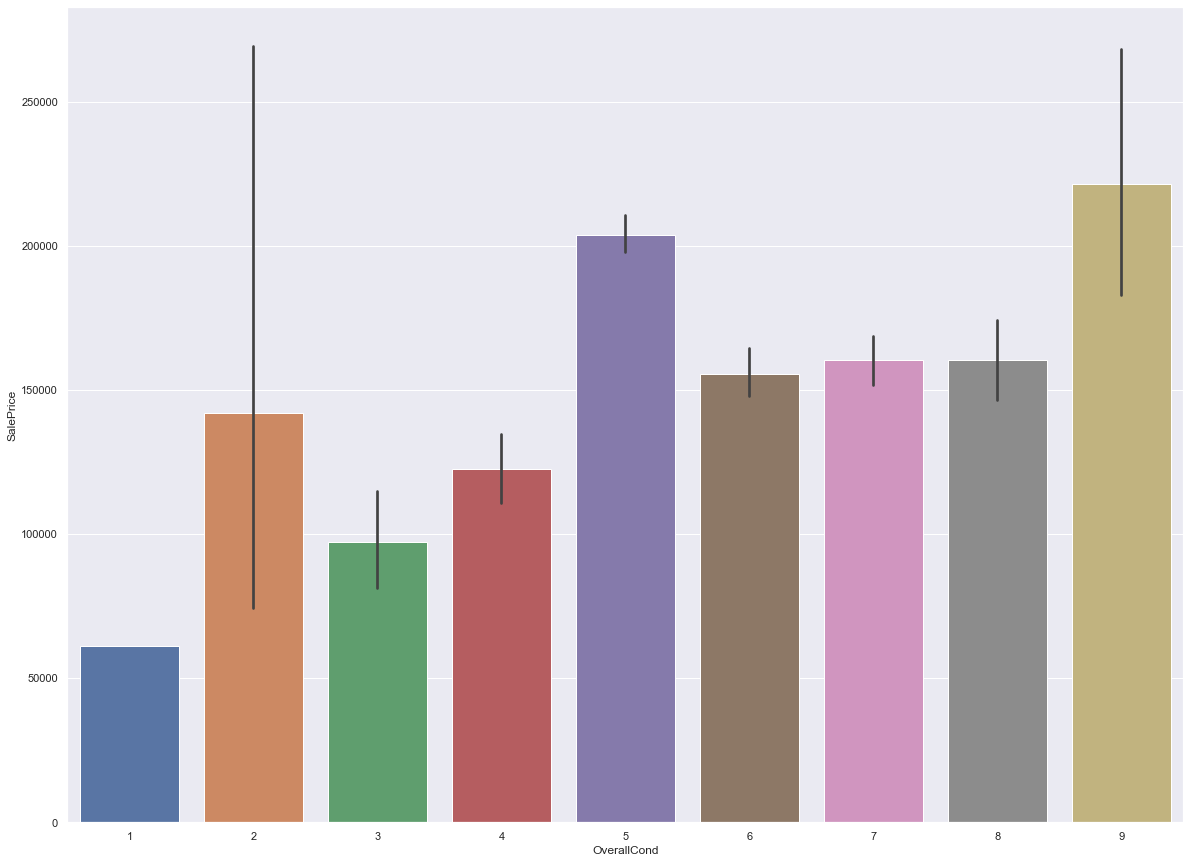

In [47]:
plt.figure(figsize=(20,15))
sns.barplot('OverallCond','SalePrice',data=train)

OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
    
    We conclude that Houses with Very excellent conditions have high prices.

In [48]:
train['YearBuilt'].value_counts()

2006    57
2005    51
2007    41
2004    37
2003    33
        ..
1913     1
1917     1
1927     1
1989     1
1875     1
Name: YearBuilt, Length: 110, dtype: int64

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


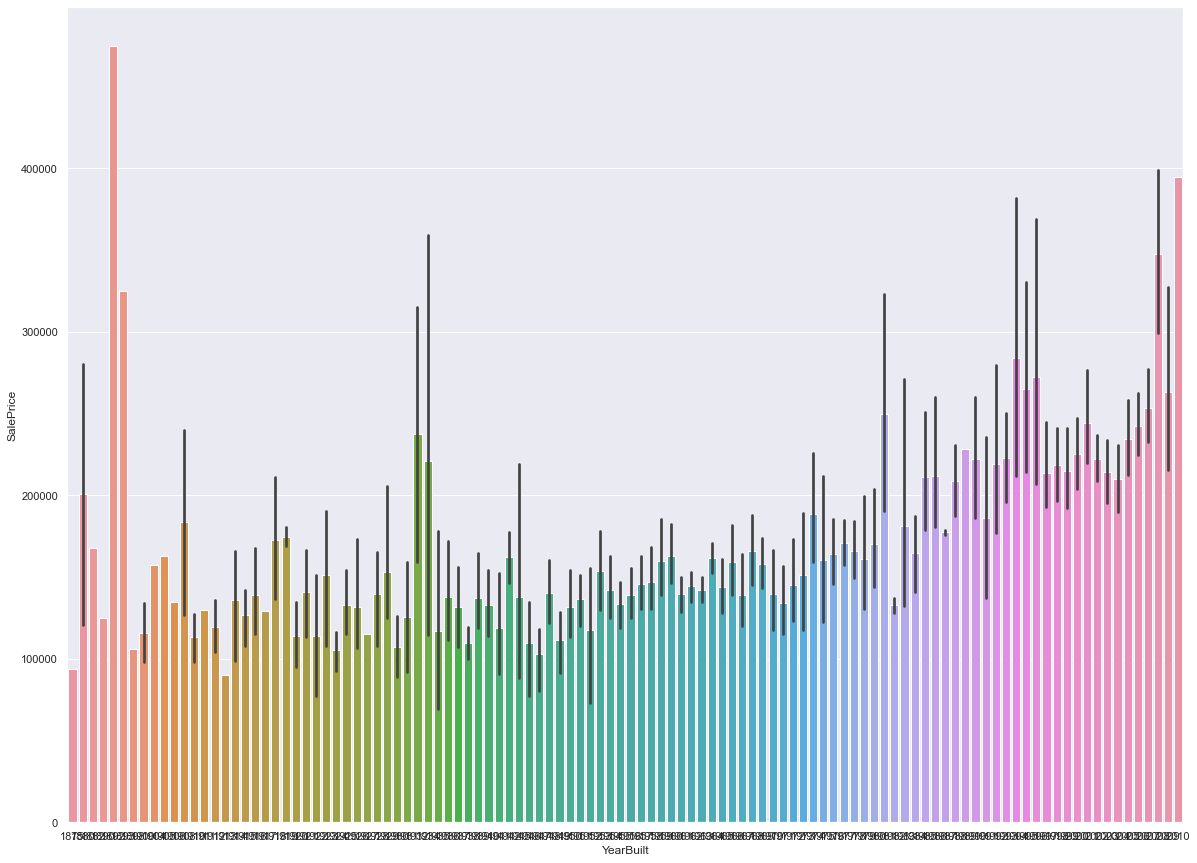

In [49]:
plt.figure(figsize=(20,15))
sns.barplot('YearBuilt','SalePrice',data=train)

We conclude that the houses build in 18's have highest value

In [50]:
train['YearRemodAdd'].value_counts()

1950    146
2006     82
2007     64
2005     57
2004     46
       ... 
2010      5
1974      4
1983      4
1952      4
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64

In [51]:
train['RoofStyle'].value_counts()

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


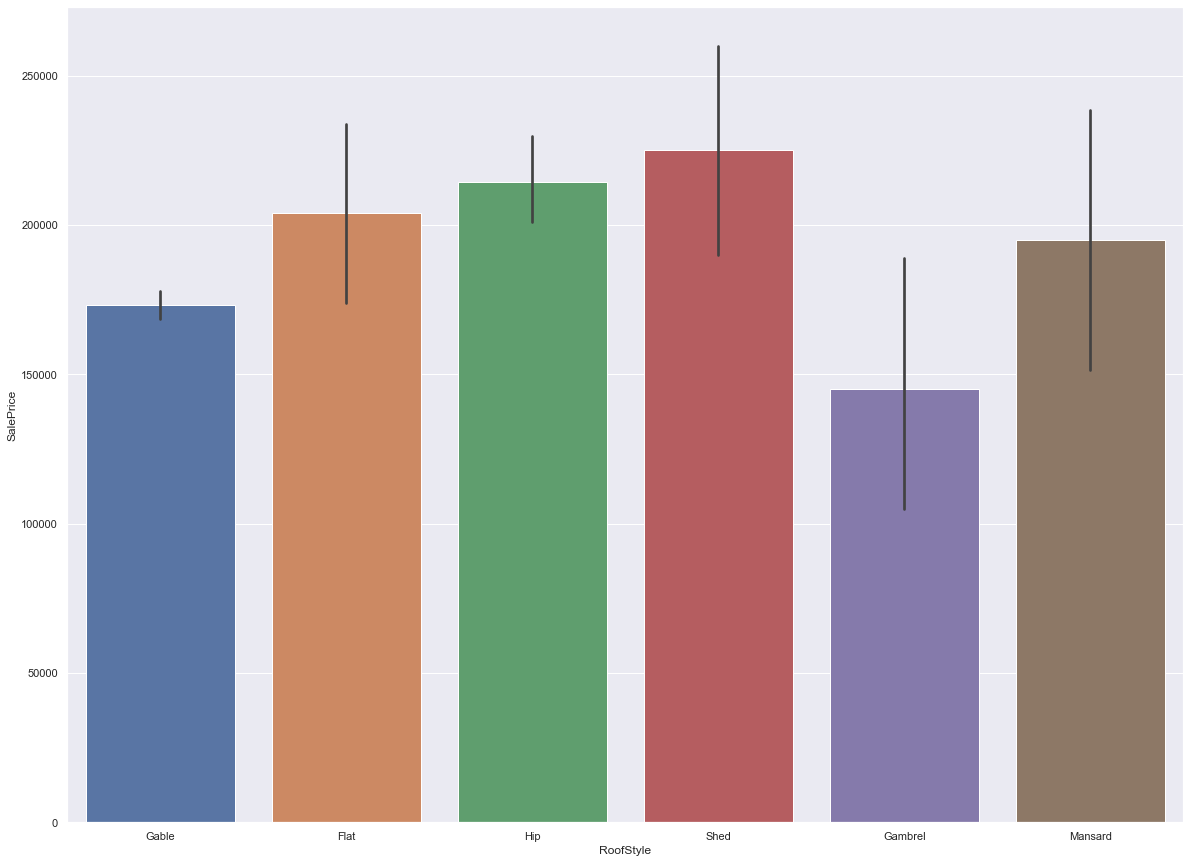

In [52]:
plt.figure(figsize=(20,15))
sns.barplot('RoofStyle','SalePrice',data=train)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
    
    We conclude that the houses with Shed have High prices while those with Gambrel	Gabrel (Barn) have least prices.

In [53]:
train['RoofMatl'].value_counts()

CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
ClyTile       1
Membran       1
Roll          1
Metal         1
Name: RoofMatl, dtype: int64

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


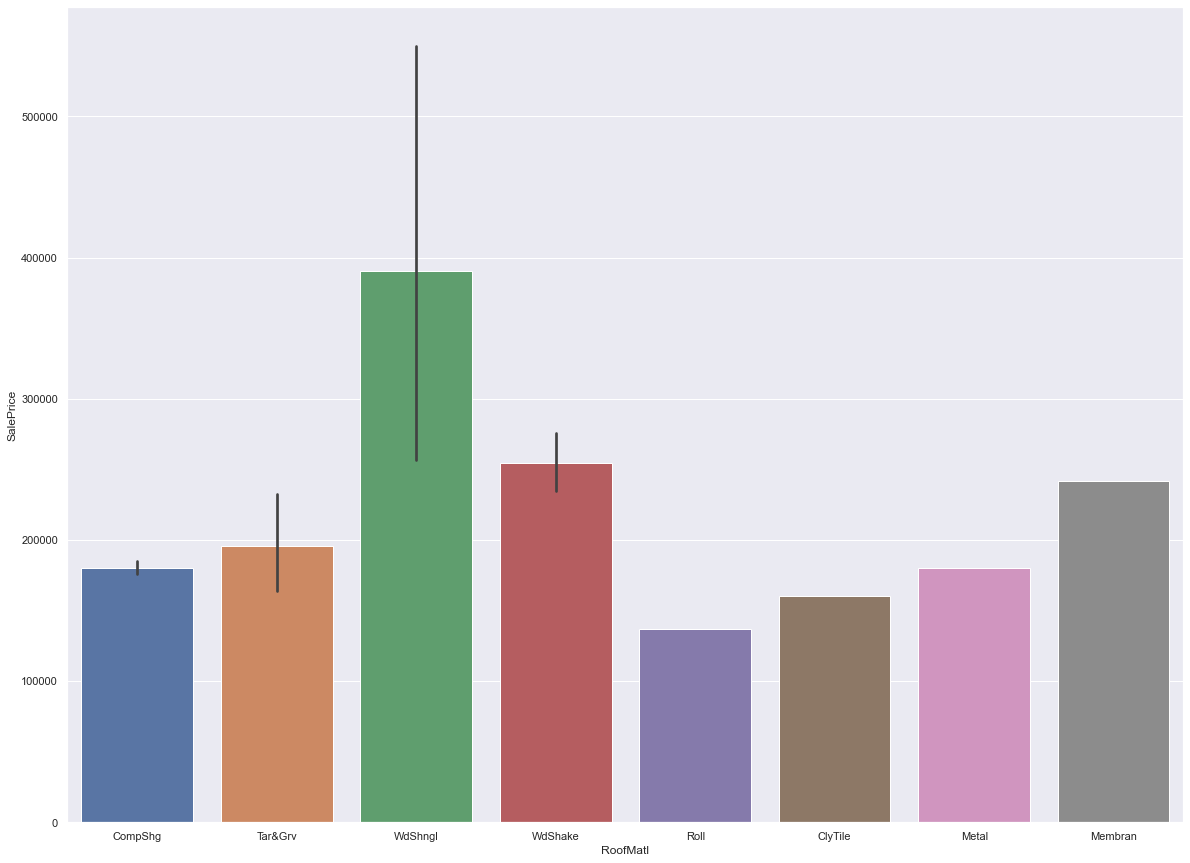

In [54]:
plt.figure(figsize=(20,15))
sns.barplot('RoofMatl','SalePrice',data=train)

RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
    
    We conclude that the WdShngl roof material has the highest prices while roll have least price.

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


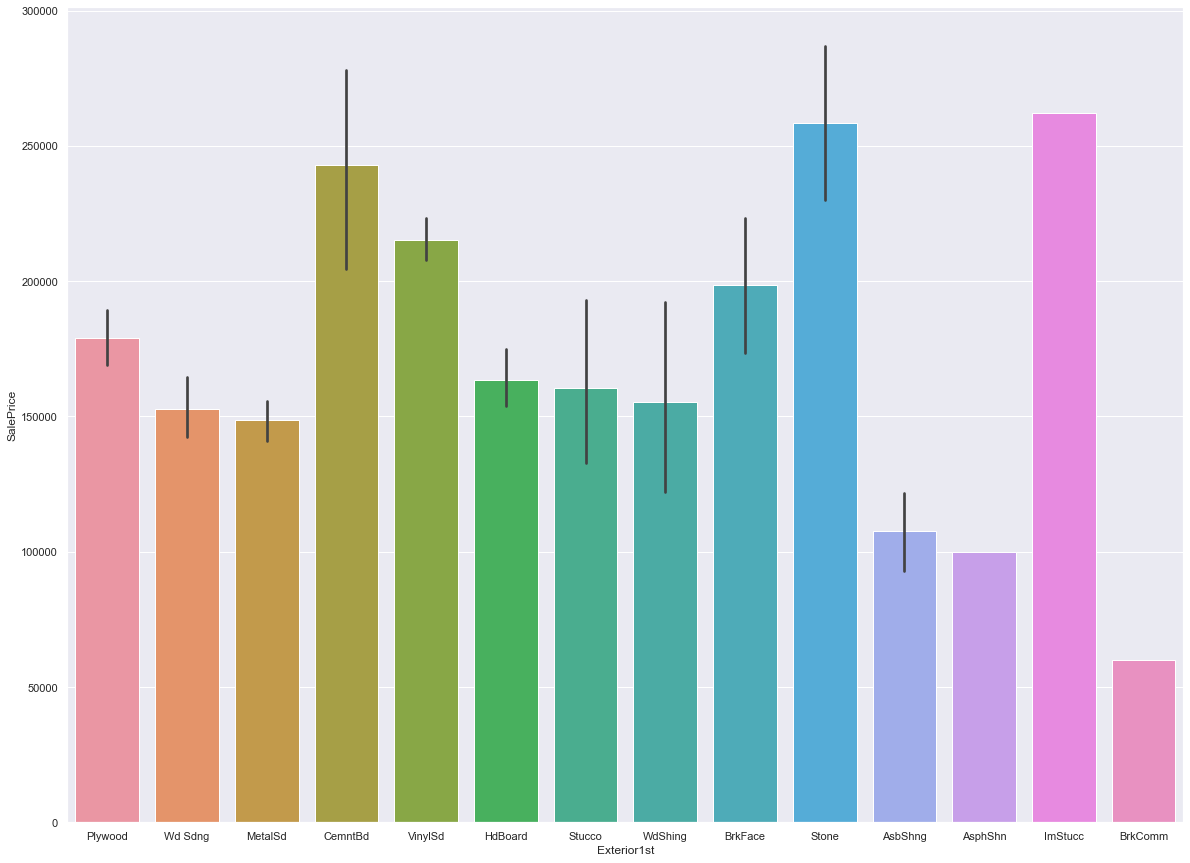

In [55]:
plt.figure(figsize=(20,15))
sns.barplot('Exterior1st','SalePrice',data=train)

Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
        
         ImStucc have highest price while BrkComm have least price.

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


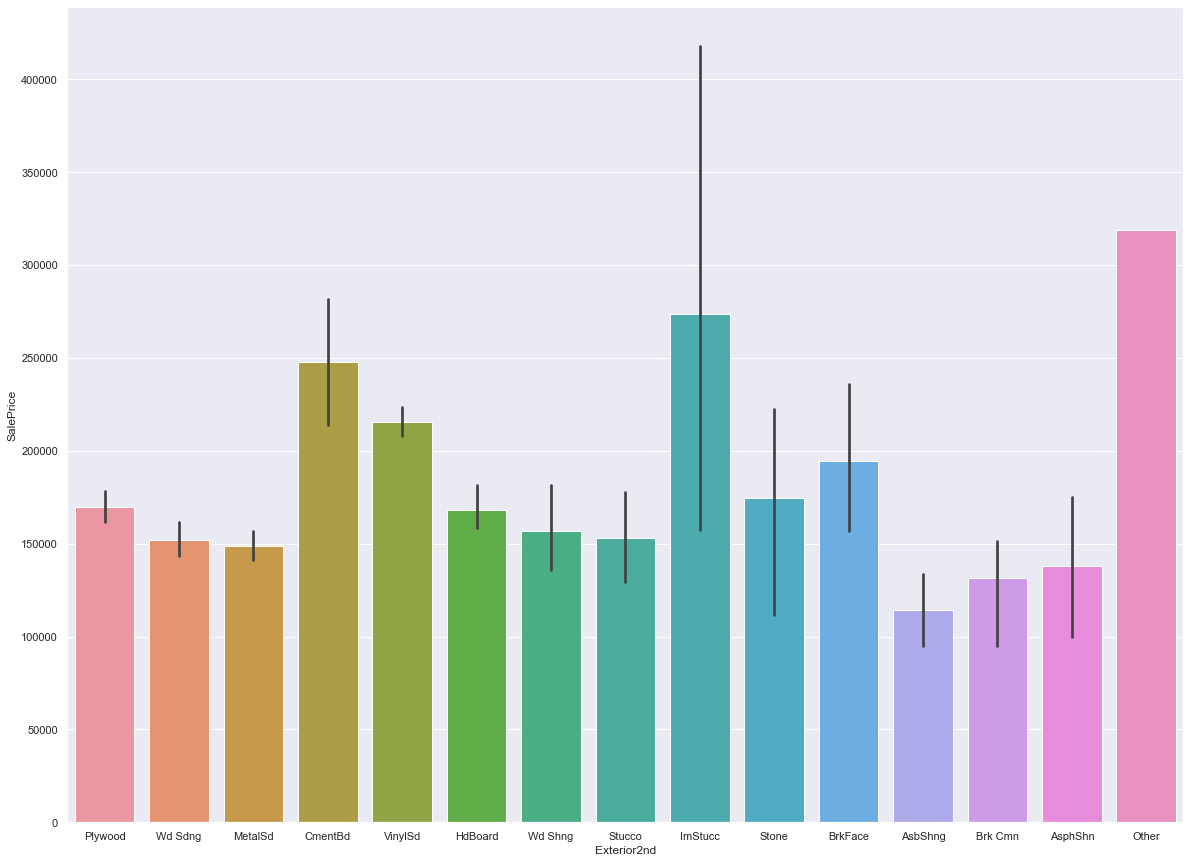

In [56]:
plt.figure(figsize=(20,15))
sns.barplot('Exterior2nd','SalePrice',data=train)

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


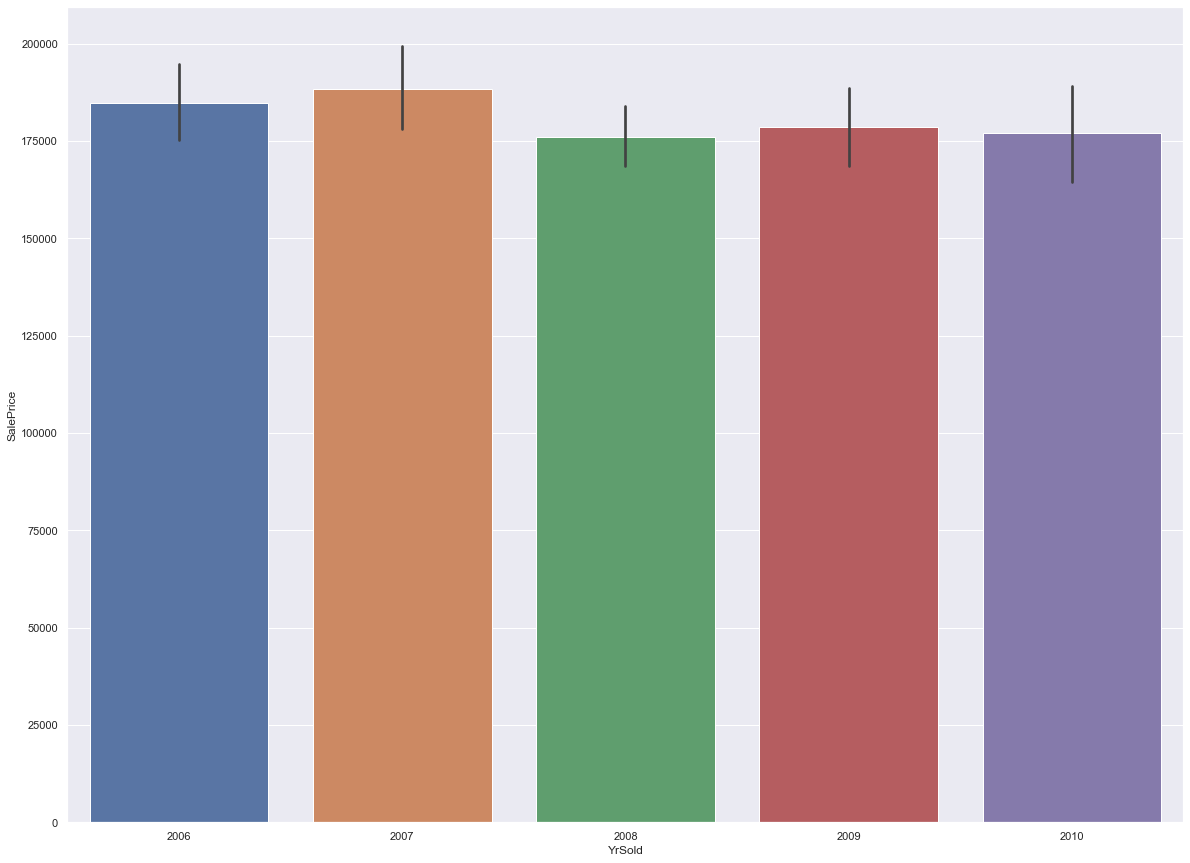

In [57]:
plt.figure(figsize=(20,15))
sns.barplot('YrSold','SalePrice',data=train)

We conclude house constructed in year 2007 have higest prices.

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


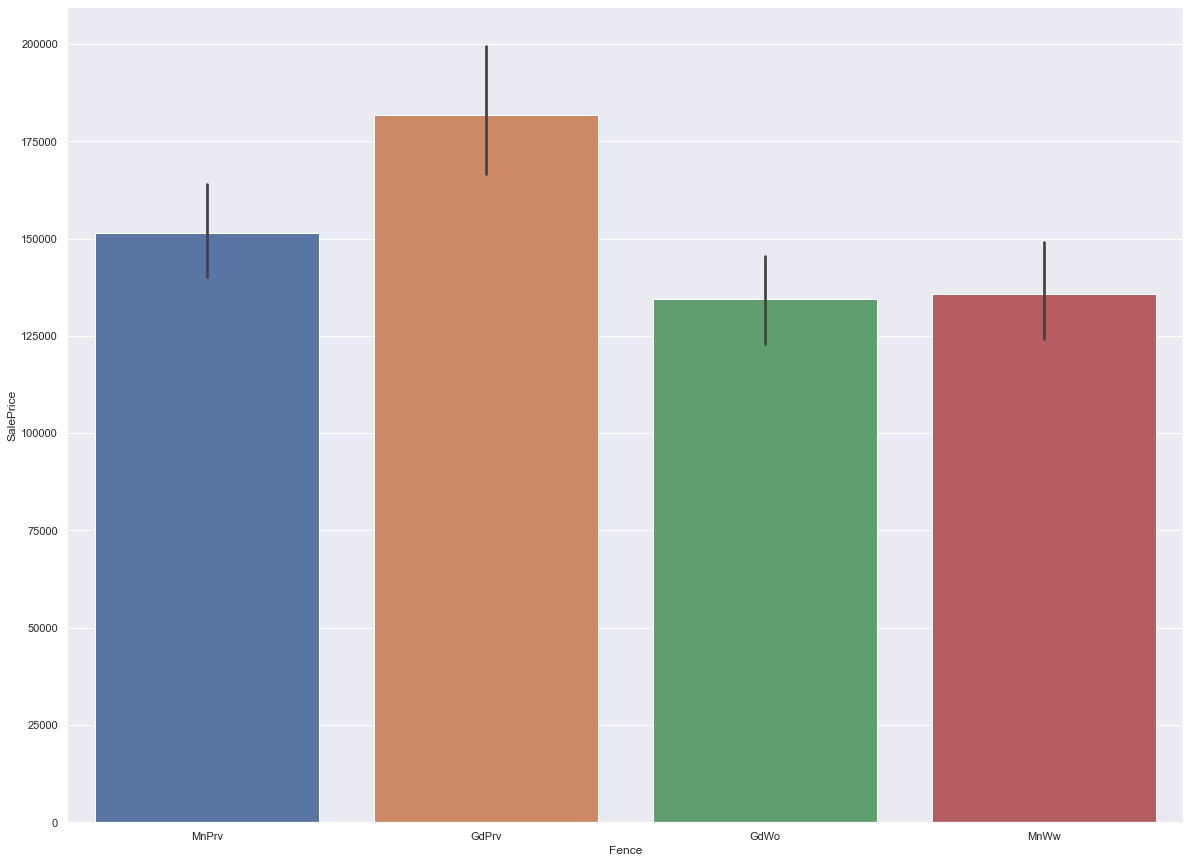

In [58]:

plt.figure(figsize=(20,15))
sns.barplot('Fence','SalePrice',data=train)

Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
    
    House with GdPrv have high prices.

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


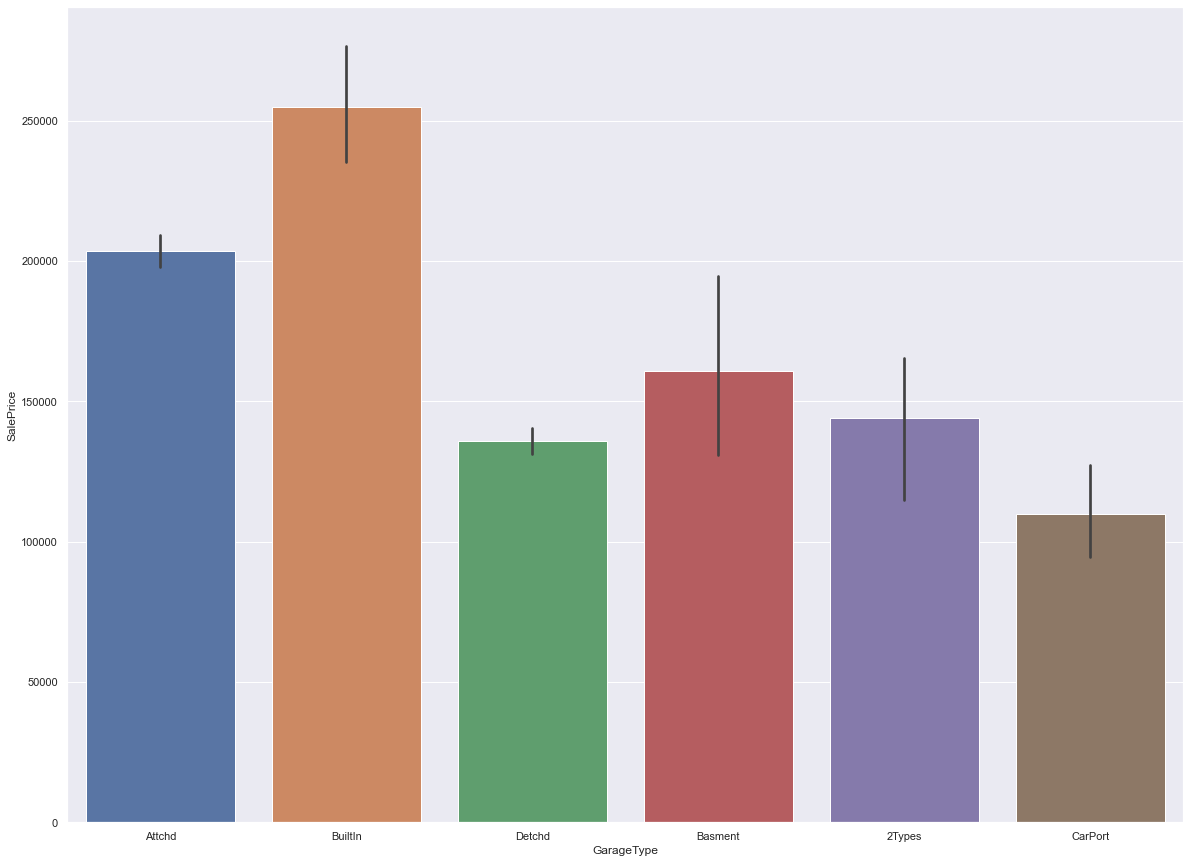

In [59]:

plt.figure(figsize=(20,15))
sns.barplot('GarageType','SalePrice',data=train)

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
    
    
    House with Builtin Garage has highest price.

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


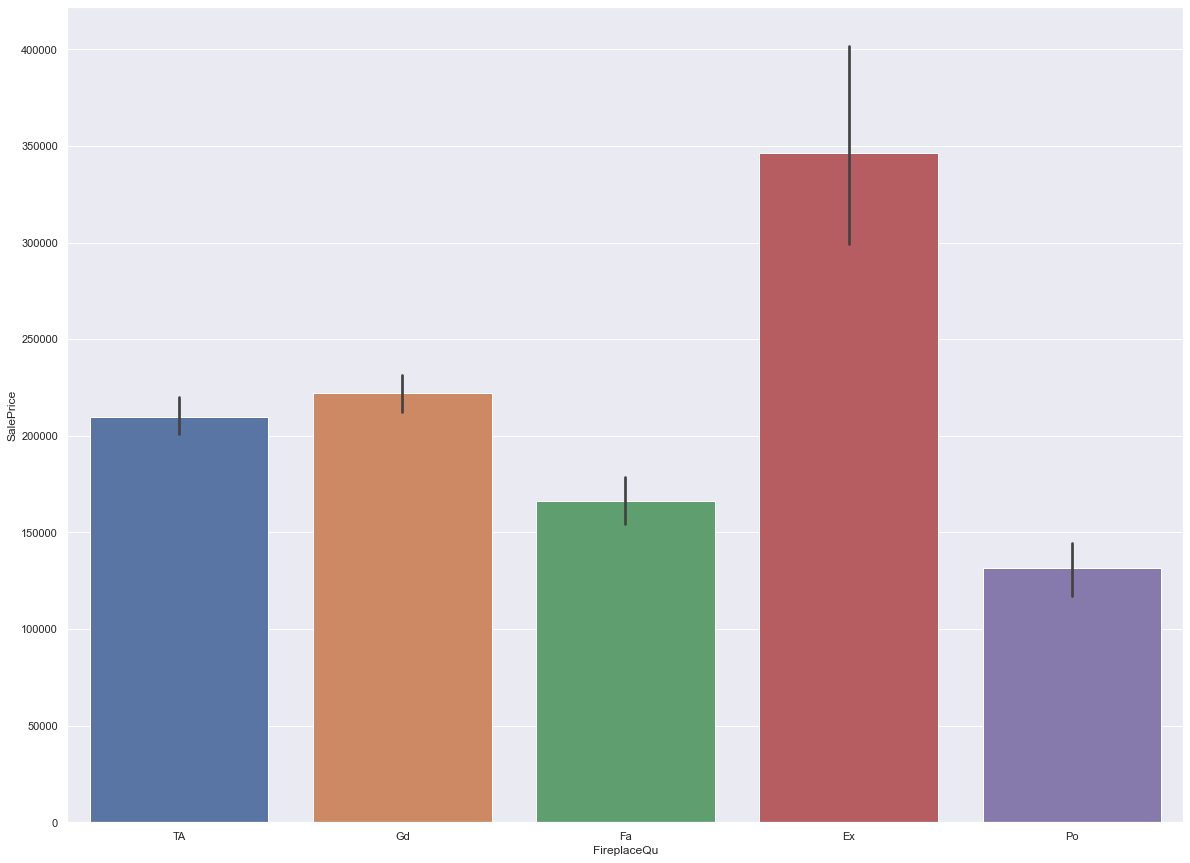

In [60]:


plt.figure(figsize=(20,15))
sns.barplot('FireplaceQu','SalePrice',data=train)


       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
        
        We fireplace with Ex has highest prices.

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


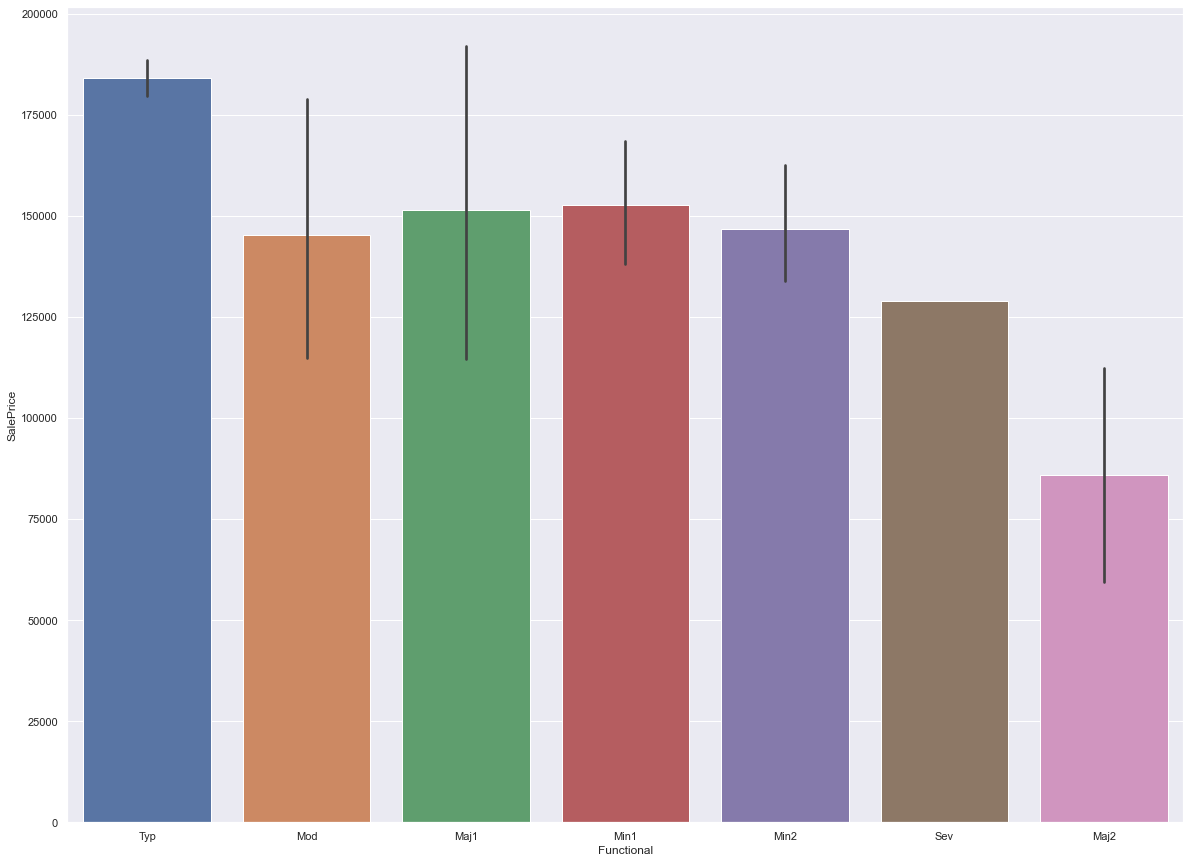

In [61]:


plt.figure(figsize=(20,15))
sns.barplot('Functional','SalePrice',data=train)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
    
    Houses with Typ has highest prices.

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


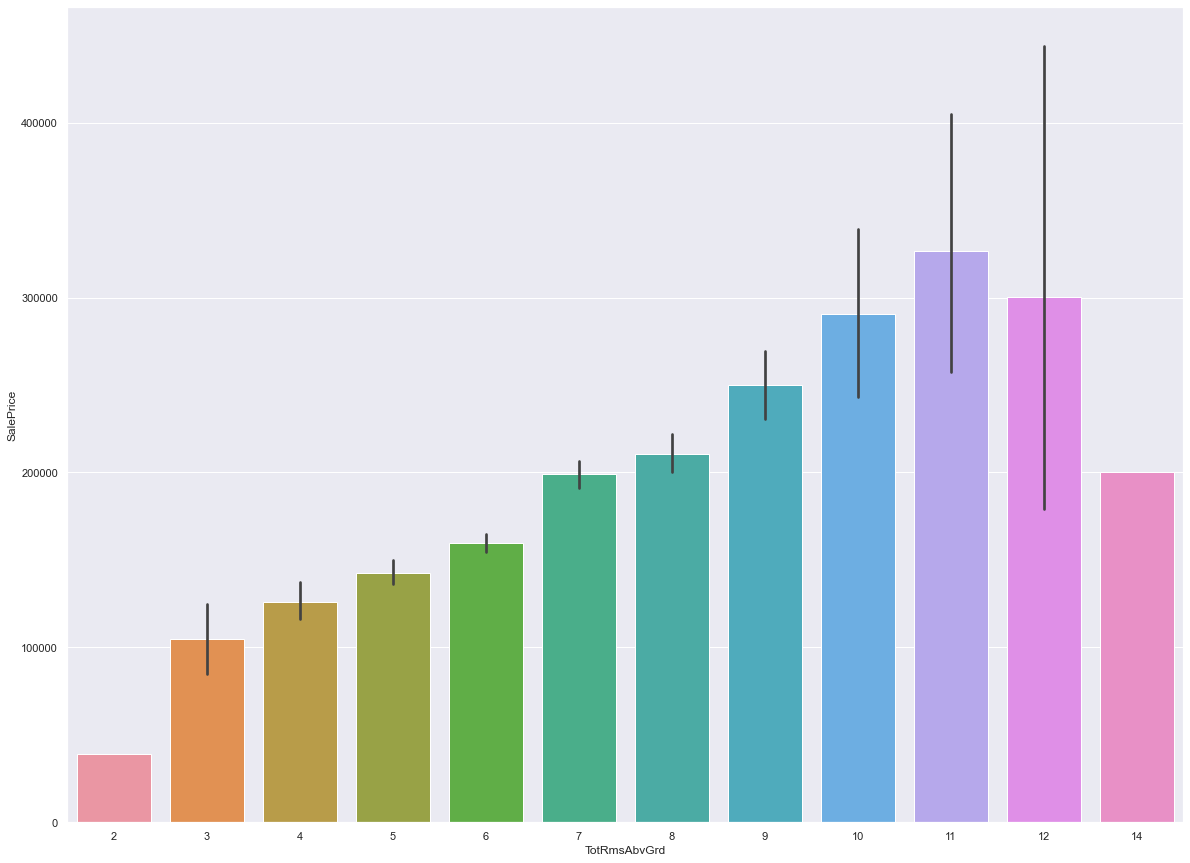

In [62]:
plt.figure(figsize=(20,15))
sns.barplot('TotRmsAbvGrd','SalePrice',data=train)

Houses with total  numbers of 11 rooms are highest in prices

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


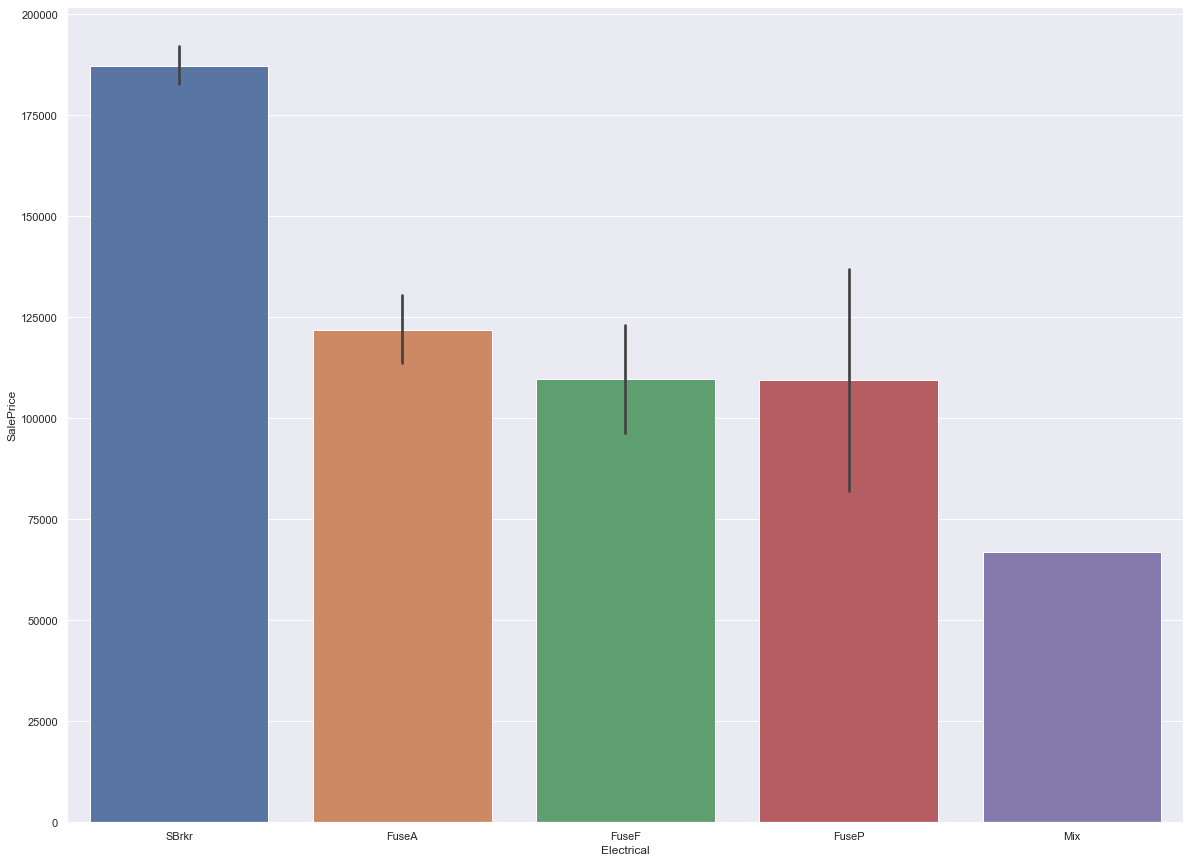

In [63]:
plt.figure(figsize=(20,15))
sns.barplot('Electrical','SalePrice',data=train)

HOuses with SBrkr have high prices

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


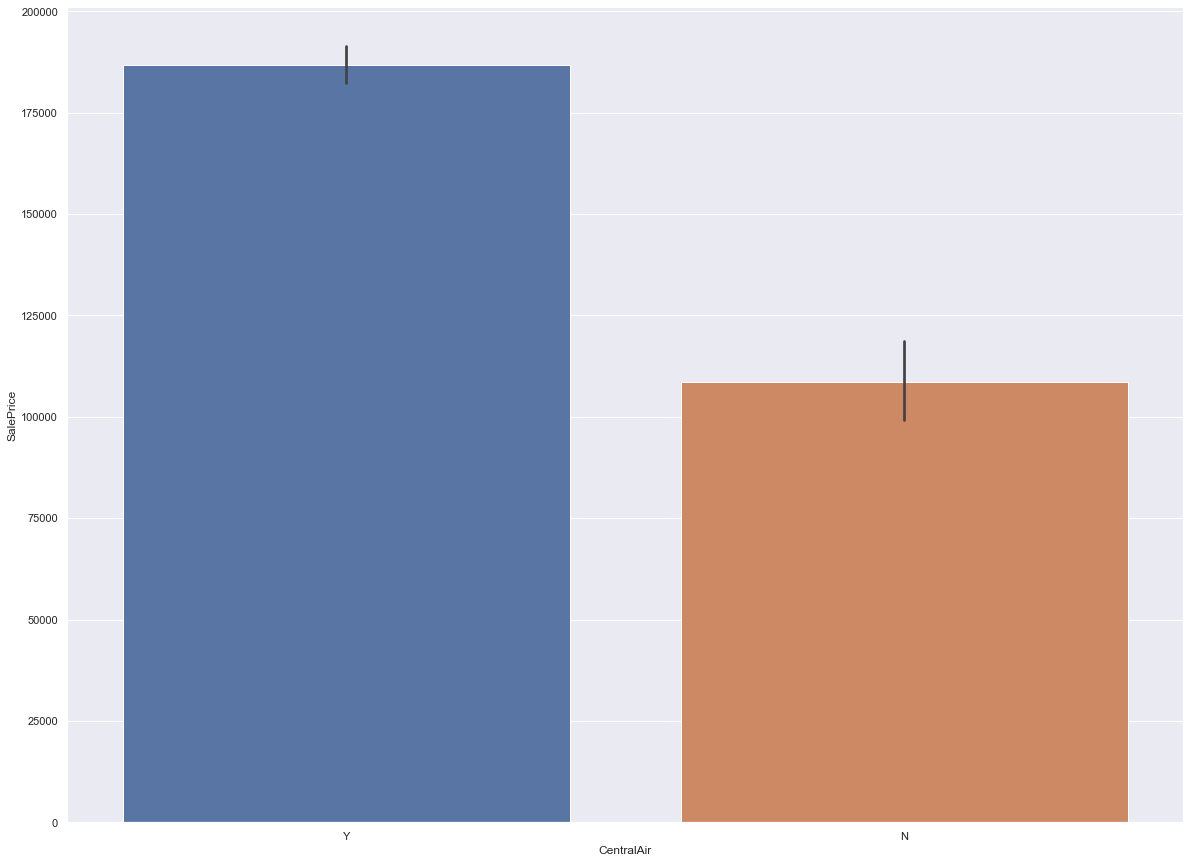

In [64]:
plt.figure(figsize=(20,15))
sns.barplot('CentralAir','SalePrice',data=train)

Houses with Central air conditioning have high prices
		
CentralAir: Central air conditioning

       N	No
       Y	Yes

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


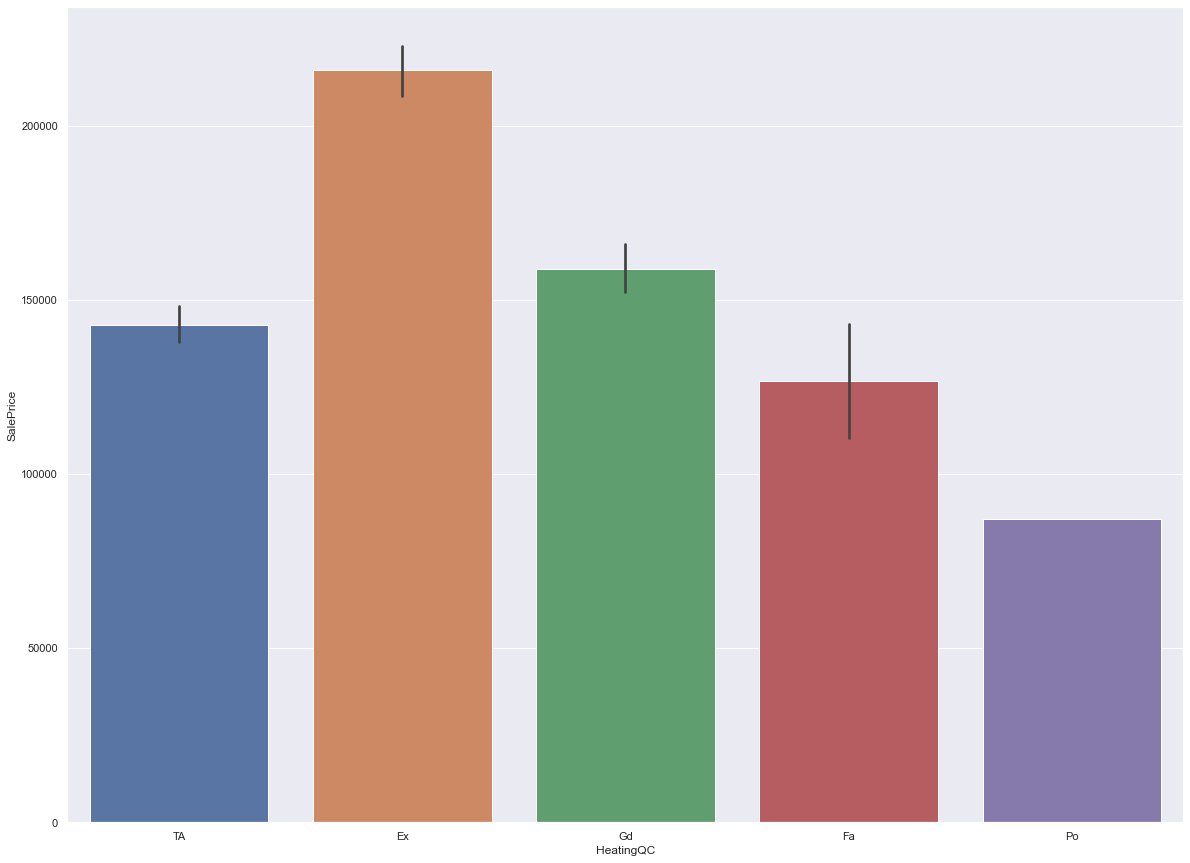

In [65]:
plt.figure(figsize=(20,15))
sns.barplot('HeatingQC','SalePrice',data=train)

		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
        
        Houses with Ex have high prices.

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


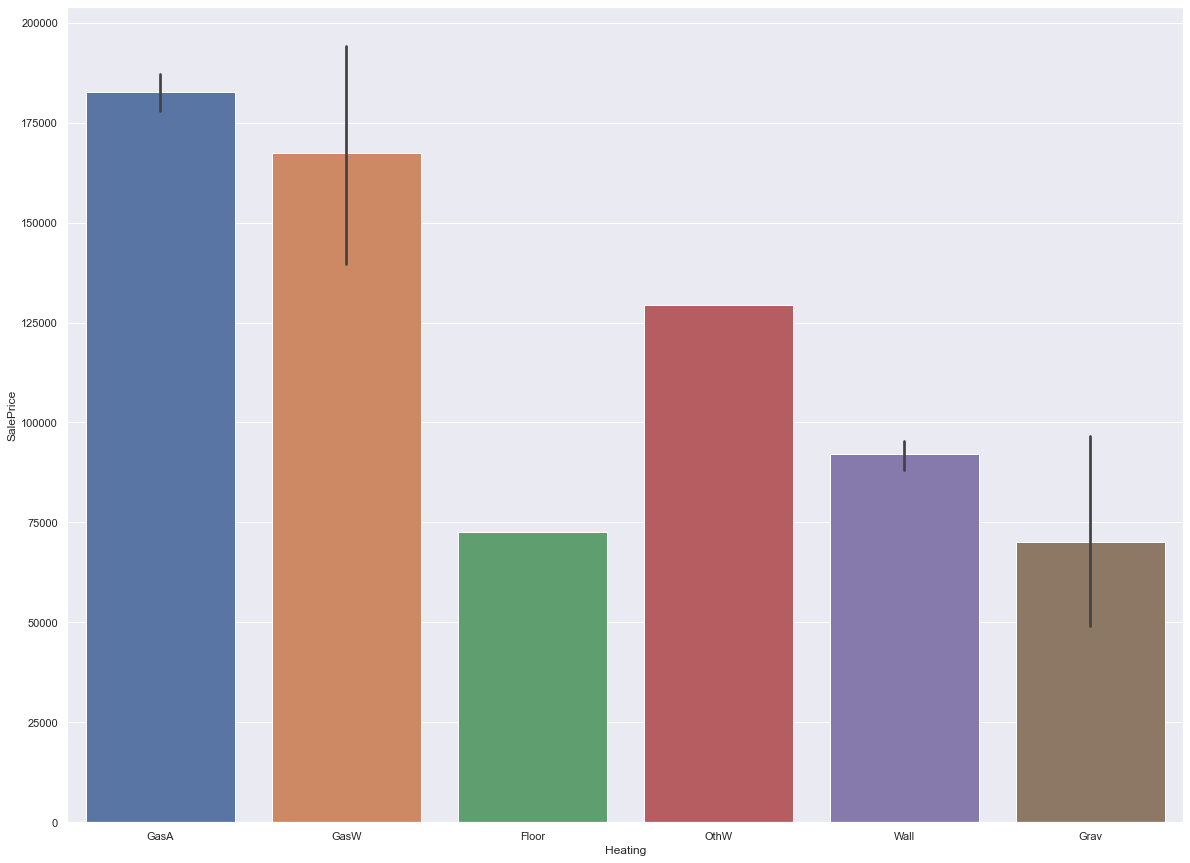

In [66]:

plt.figure(figsize=(20,15))
sns.barplot('Heating','SalePrice',data=train)

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
        
        Houses with GasA have high prices

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


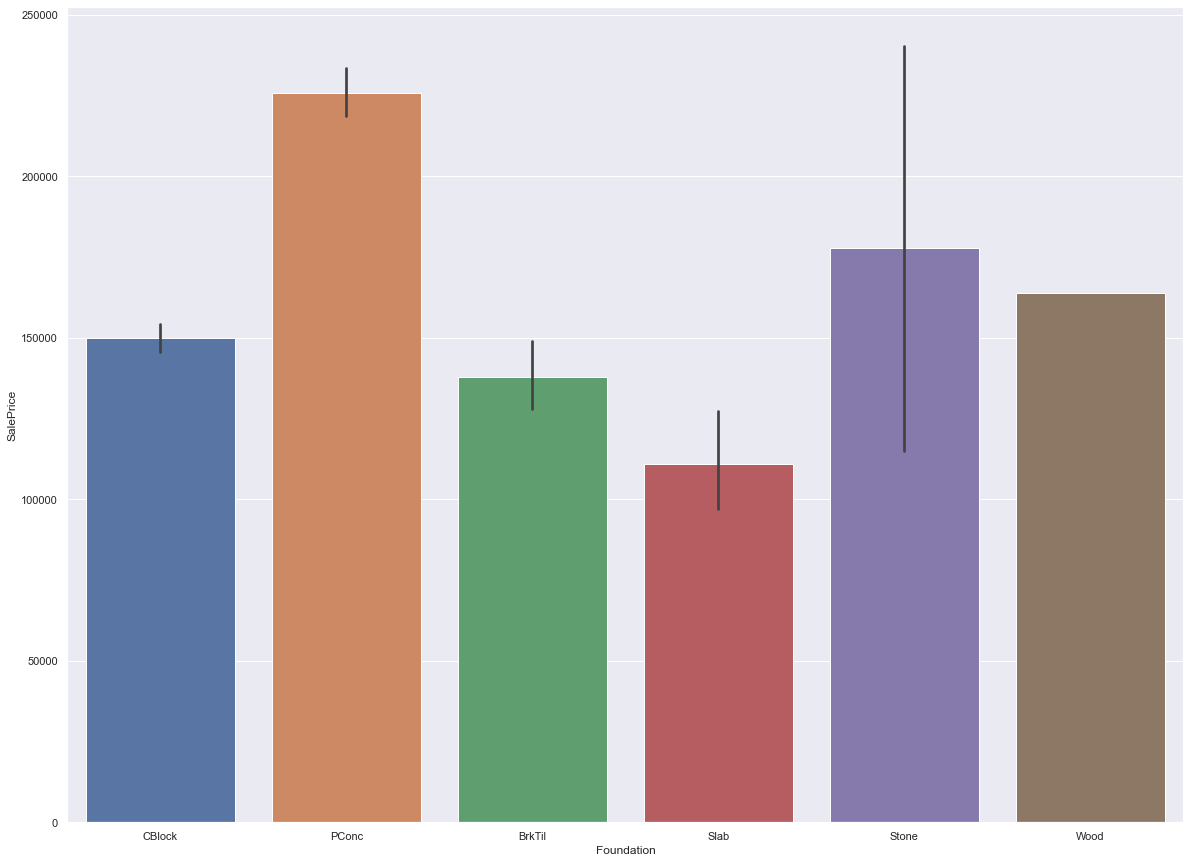

In [67]:

plt.figure(figsize=(20,15))
sns.barplot('Foundation','SalePrice',data=train)

Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
        
        Houses wih PConc have high prices

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


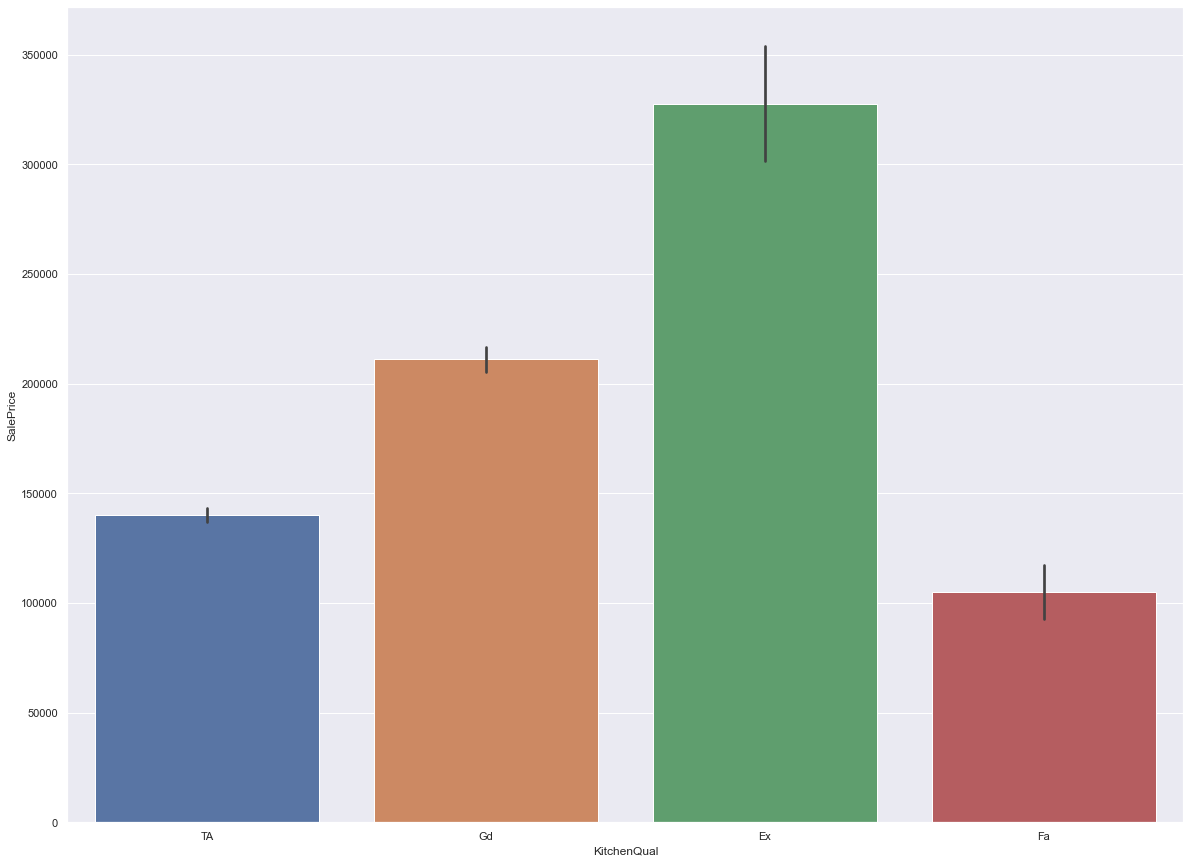

In [68]:

plt.figure(figsize=(20,15))
sns.barplot('KitchenQual','SalePrice',data=train)

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
        
        Houses with EX have high prices.

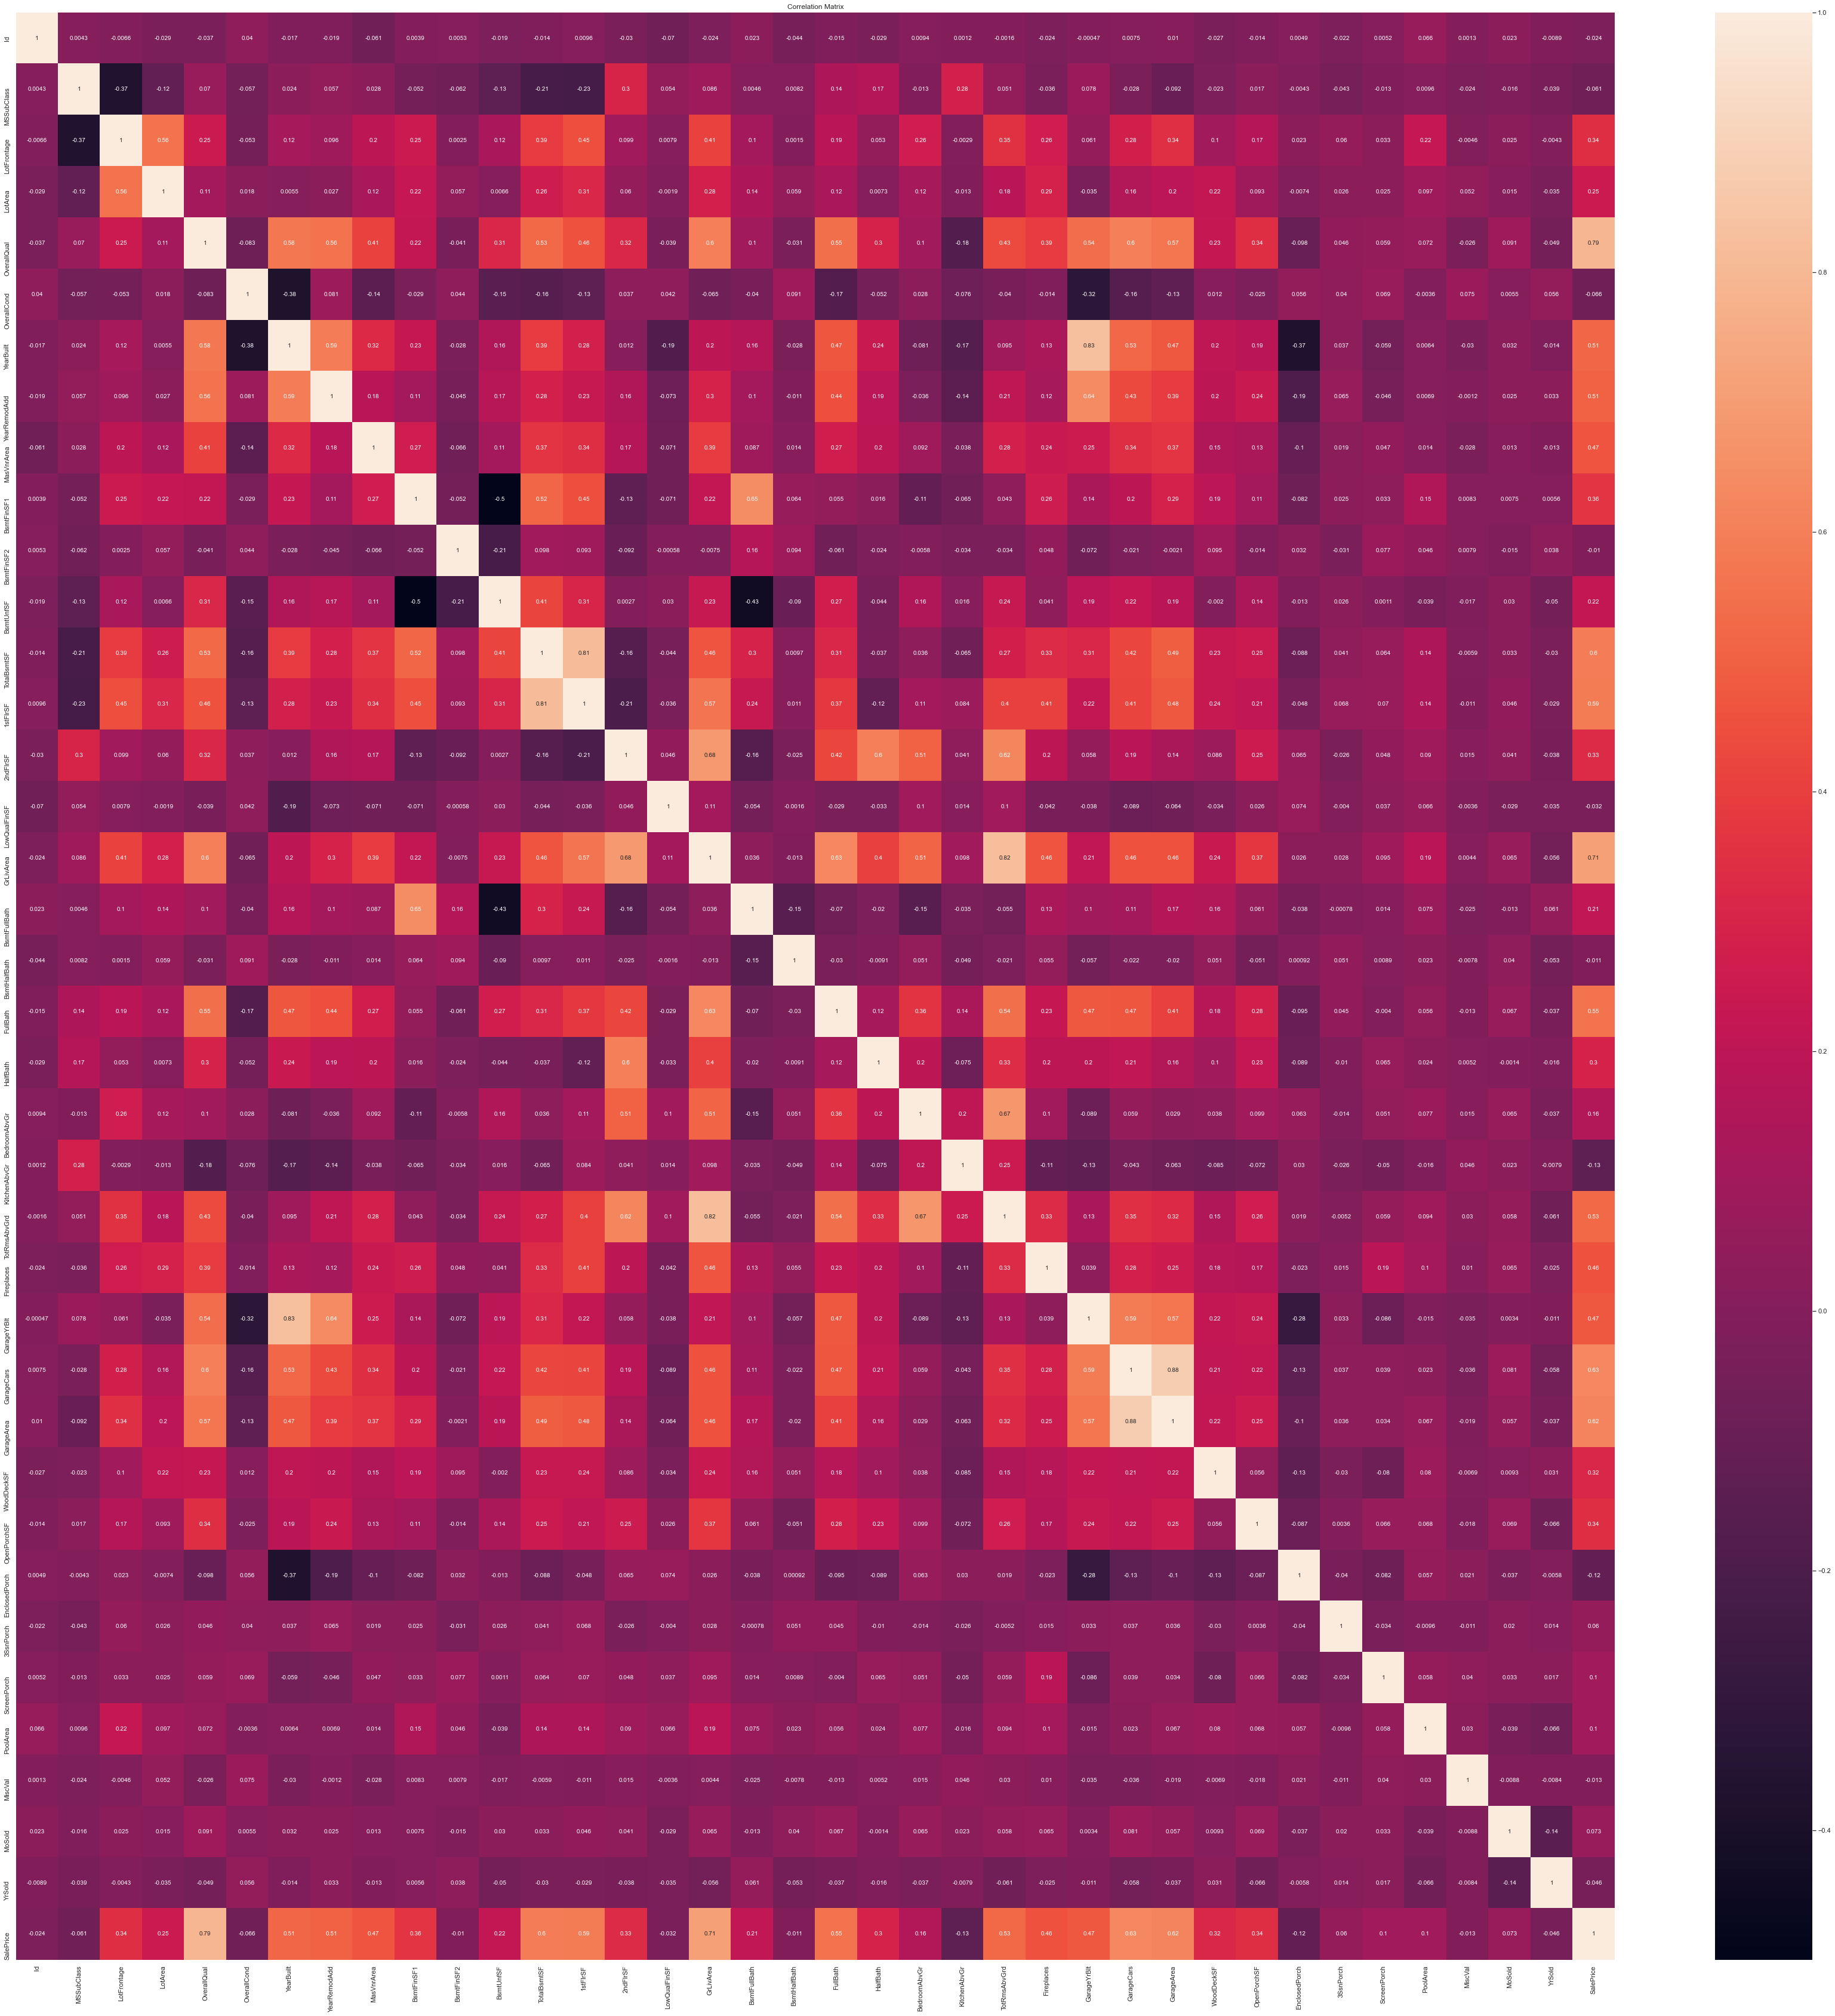

In [69]:
corr_mat=train.corr()
plt.figure(figsize=[60,60])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

In [70]:
train = train.drop(['Alley','BsmtFinSF2','LowQualFinSF','KitchenAbvGr','Utilities','PoolQC'],axis=1)
test= test.drop(['Alley','BsmtFinSF2','LowQualFinSF','KitchenAbvGr','Utilities','PoolQC'],axis=1)

In [74]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
var_mod = ['MSZoning','Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2'
           ,'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
          'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure',
          'BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu',
          'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','Fence','MiscFeature','SaleType','SaleCondition']

for i in var_mod:
    train[i] = LE.fit_transform(train[i].astype(str))
    
for i in var_mod:
    test[i] = LE.fit_transform(test[i].astype(str))
    
   

X and Y 

In [75]:
x=train.iloc[:,:-1]
y=train.iloc[:,-1]

In [76]:
x.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,127,120,3,NaN,4928,1,0,3,4,0,...,0,0,0,4,4,0,2,2007,8,4
1,889,20,3,95.0,15865,1,0,3,4,1,...,0,224,0,4,4,0,10,2007,8,4
2,793,60,3,92.0,9920,1,0,3,1,0,...,0,0,0,4,4,0,6,2007,8,4
3,110,20,3,105.0,11751,1,0,3,4,0,...,0,0,0,2,4,0,1,2010,0,4
4,422,20,3,NaN,16635,1,0,3,2,0,...,0,0,0,4,4,0,6,2009,8,4


In [77]:
y.head()

0    128000
1    268000
2    269790
3    190000
4    215000
Name: SalePrice, dtype: int64

In [78]:
train['LotFrontage']= train['LotFrontage'].fillna(train['LotFrontage'].mode()[0])   # handeling NaN values with mode 
np.any(np.isnan(mat))

In [79]:
x=train.iloc[:,:-1]
y=train.iloc[:,-1]

In [80]:
x.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,127,120,3,60.0,4928,1,0,3,4,0,...,0,0,0,4,4,0,2,2007,8,4
1,889,20,3,95.0,15865,1,0,3,4,1,...,0,224,0,4,4,0,10,2007,8,4
2,793,60,3,92.0,9920,1,0,3,1,0,...,0,0,0,4,4,0,6,2007,8,4
3,110,20,3,105.0,11751,1,0,3,4,0,...,0,0,0,2,4,0,1,2010,0,4
4,422,20,3,60.0,16635,1,0,3,2,0,...,0,0,0,4,4,0,6,2009,8,4


In [81]:
y.head()

0    128000
1    268000
2    269790
3    190000
4    215000
Name: SalePrice, dtype: int64

# Modelling 



This is an example of classification, hence we will try the classification modelling techniques.

In [83]:
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error
x = train.drop("SalePrice",axis=1)
y = train["SalePrice"]

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=22)

In [87]:
x_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
414,919,60,3,103.0,13125,1,0,3,0,0,...,0,0,0,0,4,0,11,2007,8,4
250,749,20,3,59.0,10593,1,0,3,4,0,...,0,0,0,4,4,0,3,2010,8,4
418,933,20,3,84.0,11670,1,0,3,0,0,...,0,0,0,4,4,0,3,2007,8,4
1000,588,85,3,74.0,8740,1,0,3,4,0,...,0,0,0,4,4,0,7,2009,8,4
710,1175,70,3,80.0,16560,1,0,3,4,0,...,0,0,0,4,4,0,7,2006,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,458,20,3,60.0,53227,1,0,2,1,1,...,0,0,0,4,4,0,3,2008,8,4
960,953,85,3,60.0,7200,1,3,3,4,0,...,0,0,0,2,4,0,4,2009,8,4
812,124,120,3,55.0,7892,1,3,3,4,0,...,0,0,0,4,4,0,3,2008,8,4
132,604,160,1,30.0,3182,1,3,3,4,0,...,0,0,0,4,4,0,6,2010,8,4


In [88]:
x_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
663,613,60,3,60.0,11885,1,3,3,4,0,...,0,0,0,4,4,0,11,2009,8,4
829,783,20,3,67.0,16285,1,1,3,4,0,...,0,0,0,4,4,0,6,2009,8,4
1152,1423,120,4,37.0,4435,1,3,3,4,0,...,0,0,0,4,4,0,3,2008,8,4
516,383,60,3,79.0,9245,1,0,3,4,0,...,0,0,0,4,4,0,4,2007,8,4
773,263,80,3,88.0,8471,1,0,3,0,0,...,0,0,0,1,4,0,7,2006,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,374,20,3,79.0,10634,1,3,3,4,0,...,0,0,0,1,4,0,11,2009,8,4
331,560,120,3,60.0,3196,1,3,3,4,0,...,0,0,0,4,4,0,10,2006,8,4
213,1141,20,3,60.0,7350,1,3,3,0,0,...,0,0,0,4,4,0,6,2008,0,0
923,1274,80,3,124.0,11512,1,0,3,0,0,...,0,163,0,0,4,0,5,2008,8,4


In [89]:
y_train

414     238000
250     260400
418     320000
1000    137000
710     239000
         ...  
356     256000
960     133900
812     153900
132     151000
885     227000
Name: SalePrice, Length: 934, dtype: int64

In [93]:
from sklearn.linear_model import LinearRegression


In [95]:
lm = LinearRegression()


In [96]:
lm.fit(x_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').